In [1]:
import pandas as pd
import numpy as np

DataBase reading & merging

In [2]:
gauss_cols_names_path = r'E:\backup\backup_BPT\Sep2023\SDSS_Spectra\gauss_cols.txt'
gauss_cols_names_dict = {
    0 : 'name',
    1 : 'col'
}
gauss_cols_names = pd.read_csv(gauss_cols_names_path, sep=r"\s+", header=None, engine='python', usecols=gauss_cols_names_dict.keys(), names=gauss_cols_names_dict.values())
print(gauss_cols_names['name'])

GaussComplexDict = {}
for i in range(len(gauss_cols_names['name'])):
    GaussComplexDict.update({gauss_cols_names['name'][i] : int(gauss_cols_names['col'][i]) - 1})

gauss_complex_path = r'E:\databases\GAMAs\GaussFitComplex'
GaussComplex = pd.read_csv(gauss_complex_path, sep=r"\s+", header=None, index_col=0, engine='python', usecols=GaussComplexDict.values(), names=GaussComplexDict.keys())

0             SPECID
1             CATAID
2            HB_CONT
3        HB_CONT_ERR
4            HB_GRAD
           ...      
135    NIIR_FLUX_ERR
136          NIIR_EW
137      NIIR_EW_ERR
138        NIIB_NPEG
139        NIIR_NPEG
Name: name, Length: 140, dtype: object


In [3]:
specall_path = r"E:\databases\GAMAs\SpecAll.txt"
SpecAllDict = {
    0 : 'SPECID',
    3 : 'RA',
    4 : 'DEC',
    7 : 'Z',
    11 : 'URL',
    12 : 'URL_IMG',
    13 : 'CATAID_1',
    16 : 'DIST',
    17 : 'IS_SBEST',
    18 : 'IS_BEST'
}

SpecAll = pd.read_csv(specall_path, sep=r"\s+", header=None, index_col=0, engine='python', usecols=SpecAllDict.keys(), names=SpecAllDict.values())

In [4]:
all_gal_path = r'E:\backup\backup_BPT\GAMA_ETG_OLA.csv'
all_gals = pd.read_csv(all_gal_path, usecols=['SPECID', 'BPT', 'WHAN'])
all_gals = all_gals.query('WHAN == "LLR" | WHAN == "NER"')

ALL_GAUSS = pd.merge(all_gals, GaussComplex, how='inner', on='SPECID')
ALL_GAUSS['SN_CONT'] = ALL_GAUSS['HA_CONT']/ALL_GAUSS['HA_CONT_ERR']
ALL_GAUSS.to_csv(r'E:\backup\backup_BPT\Sep2023\cont_check.csv', index=False)

In [5]:
ha_broads_path = r'E:\backup\backup_BPT\Sep2023\BROAD\broads_ha_hb.csv'
ha_broads = pd.read_csv(ha_broads_path, usecols=['SPECID'])

HA_GAUSS_0 = pd.merge(ha_broads, GaussComplex, how='inner', on='SPECID')
HA_GAUSS = pd.merge(HA_GAUSS_0, SpecAll, how='inner', on='SPECID')
HA_GAUSS['HB_rest'] = HA_GAUSS['HB_CEN']/(1 + HA_GAUSS['Z'])
HA_GAUSS['HA_rest'] = HA_GAUSS['HA_CEN']/(1 + HA_GAUSS['Z'])
print(HA_GAUSS.info)
HA_GAUSS.to_csv(r'E:\backup\backup_BPT\Sep2023\SDSS_Spectra\HA_GAUSS.csv', index=False)

<bound method DataFrame.info of                  SPECID   CATAID     HB_CONT  HB_CONT_ERR   HB_GRAD  \
0   1031470589610584064   463453   18.489233     0.096836 -0.000213   
1   1034794413781444608   492762  129.321320     0.245483 -0.000026   
2   1034872204229109760   493251   34.495200     0.133997  0.000054   
3    317525791778826240    53744   45.067585     0.151922 -0.000217   
4    318699525491419136    30518   25.317469     0.147374 -0.000112   
5    319914760449583104     7618   12.377717     0.058327 -0.000211   
6    320958471644145664   692601   48.612915     0.081498 -0.000265   
7    320971116027865088    22727   28.326956     0.089535 -0.000246   
8    321040660138321920    23104   98.690250     0.311038 -0.000067   
9    323178112302999552   561225    9.467571     0.060830 -0.000079   
10   323243533244852224   751044   10.446485     0.048278 -0.000175   
11   323304006384379904   586321   84.528915     0.150330 -0.000055   
12   324318855230941184   537289   20.289557 

SDSS tests

Filename: C:\Users\ALEZHA_ACTIVE\.astropy\cache\download\url\f2cc4086f84d1eff7e47221a7196e3de\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (3839, 5)   float32   
  1  MASKS         1 BinTableHDU     13   3839R x 2C   [J, J]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


(3804.52, 9206.62)

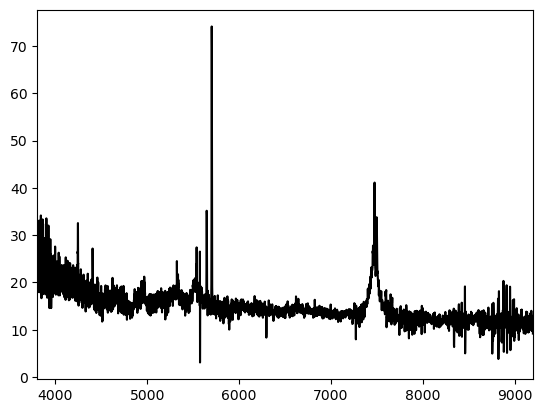

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt

path_to_file = "http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0916-52378-0532.fit"
hdul = fits.open(path_to_file)
hdul.info()
hdu = hdul[0]

flux = hdu.data[0,:]
i = np.linspace(0, int(hdu.header['NAXIS1']), int(hdu.header['NAXIS1']))
wavelength = 10**(float(hdu.header['COEFF0']) + float(hdu.header['COEFF1'])*i)

plt.plot(wavelength, flux, c = 'black')
plt.xlim(float(hdu.header['WMIN']), float(hdu.header['WMAX']))

HA line processing & plotting 

In [7]:
import pandas as pd
HA_GAUSS = pd.read_csv(r'E:\backup\backup_BPT\Sep2023\SDSS_Spectra\HA_GAUSS.csv')

e:\backup\backup_BPT\Sep2023\SDSS_Spectra\__builder__.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(path_to_save, dpi=300, bbox_inches = 'tight', pad_inches = 0.0001)
e:\backup\backup_BPT\Sep2023\SDSS_Spectra\__builder__.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16,6), tight_layout=True)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This 

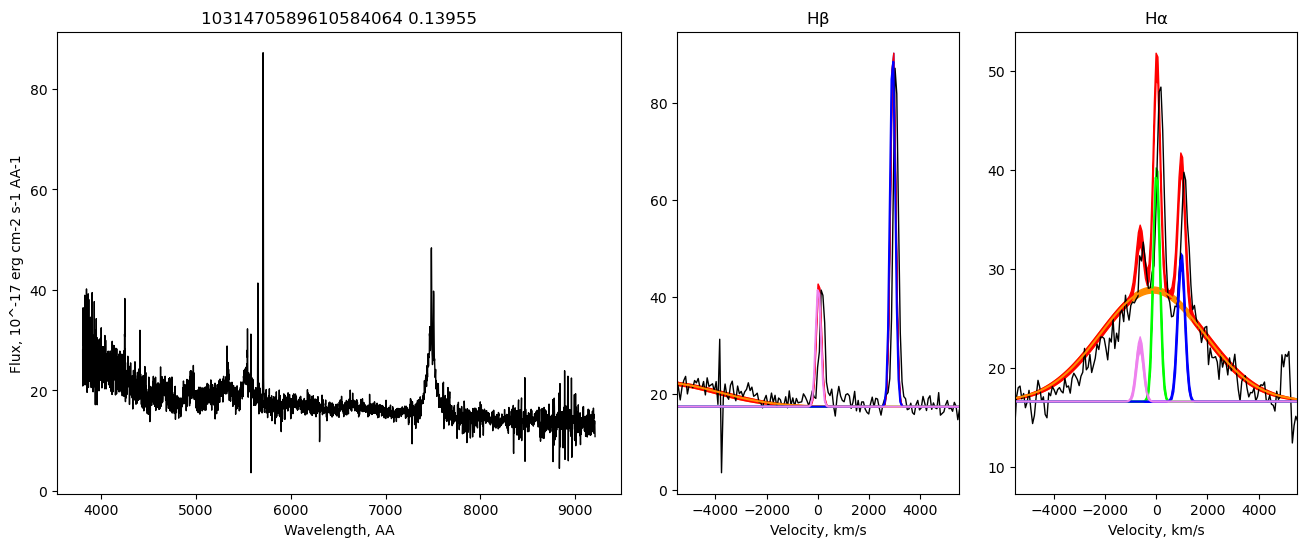

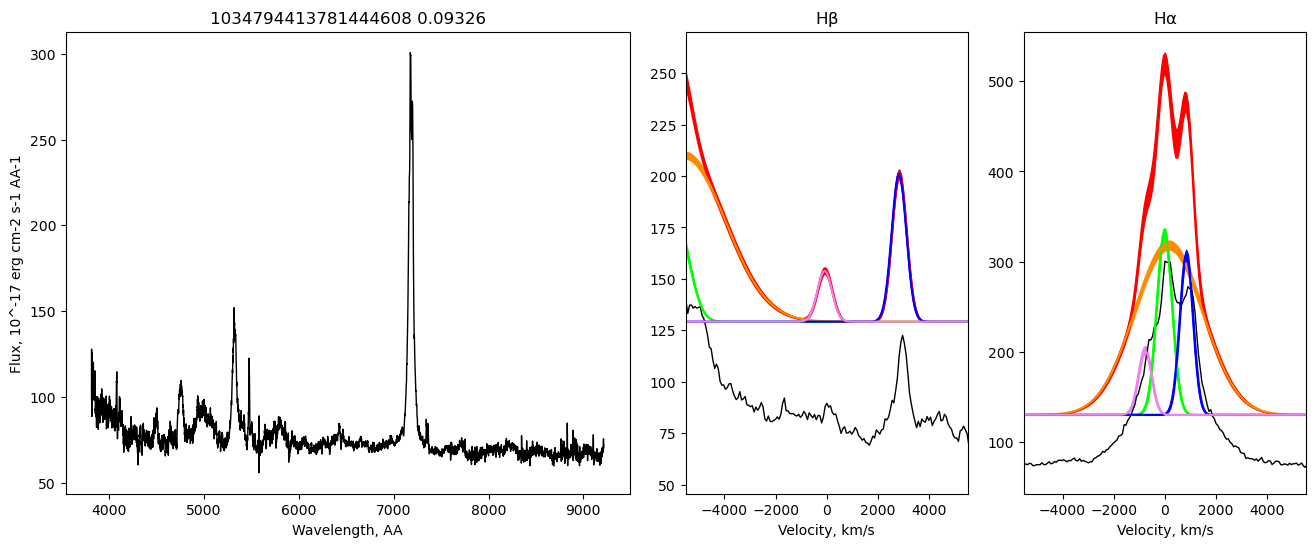

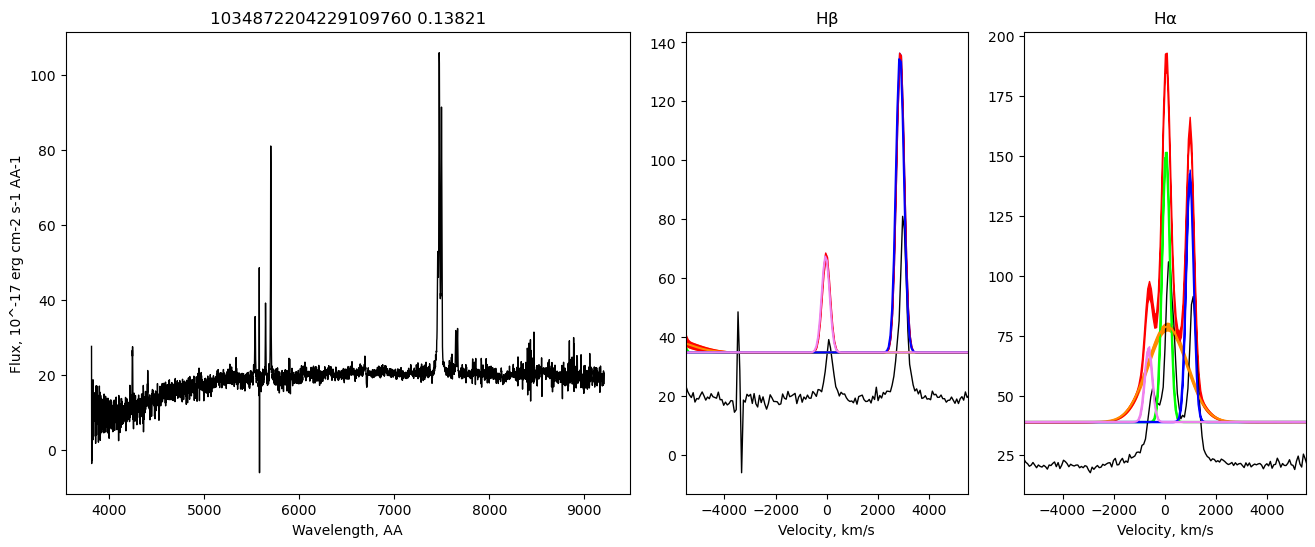

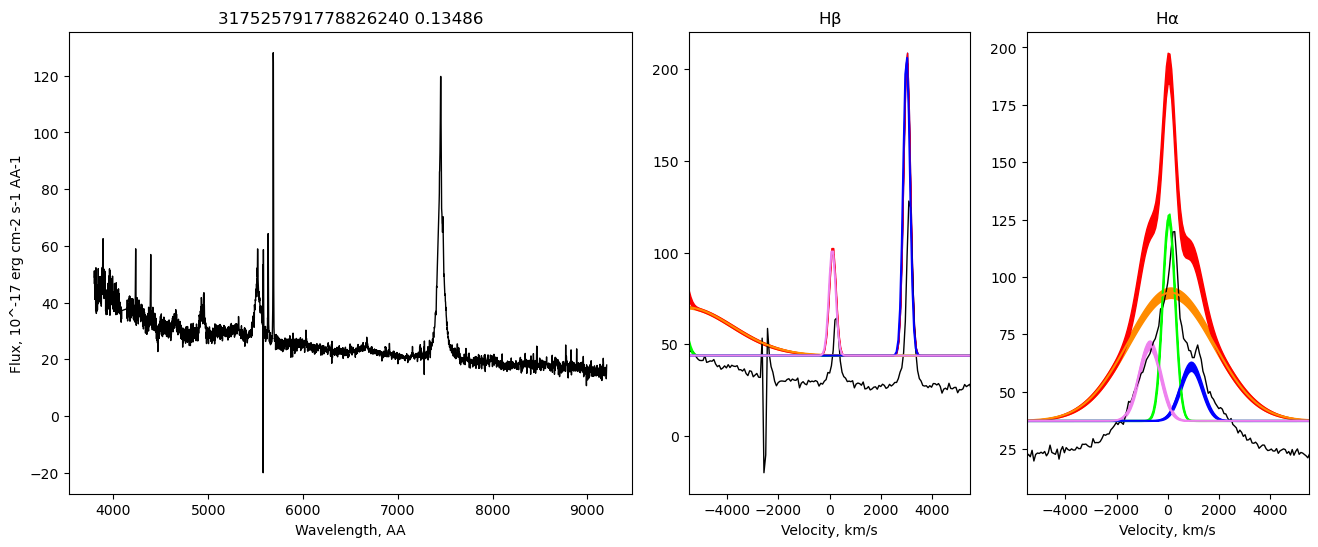

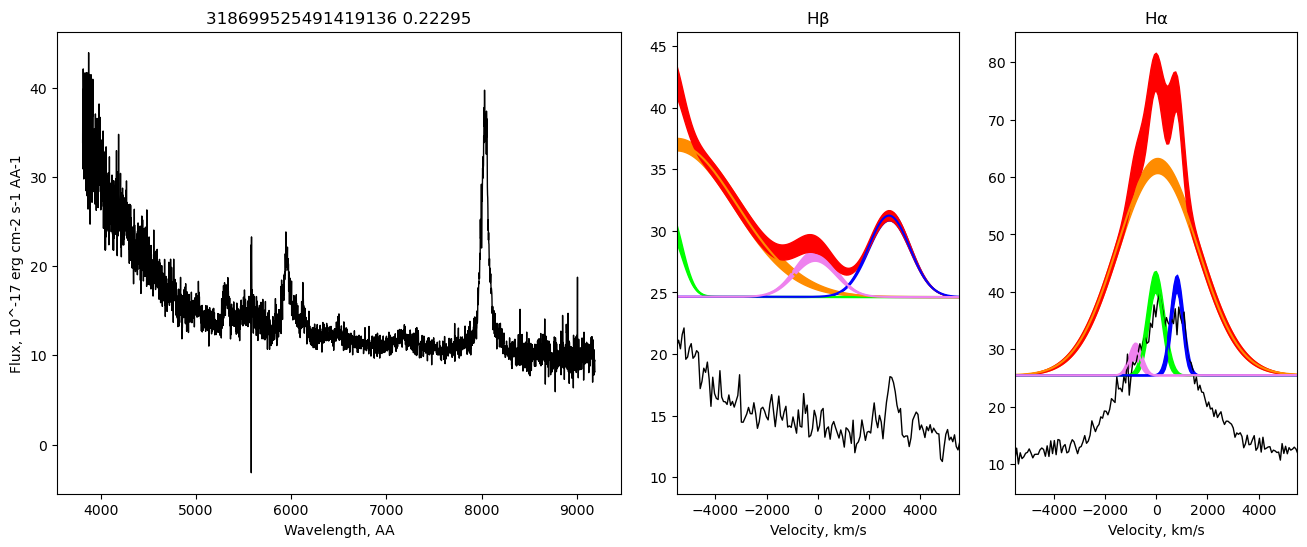

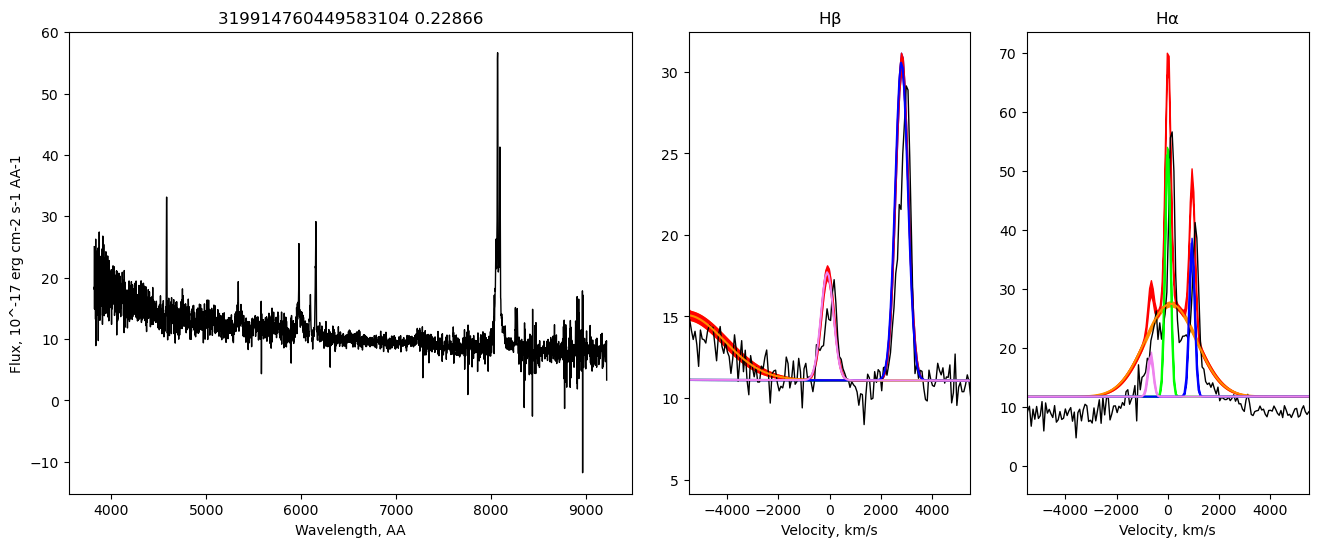

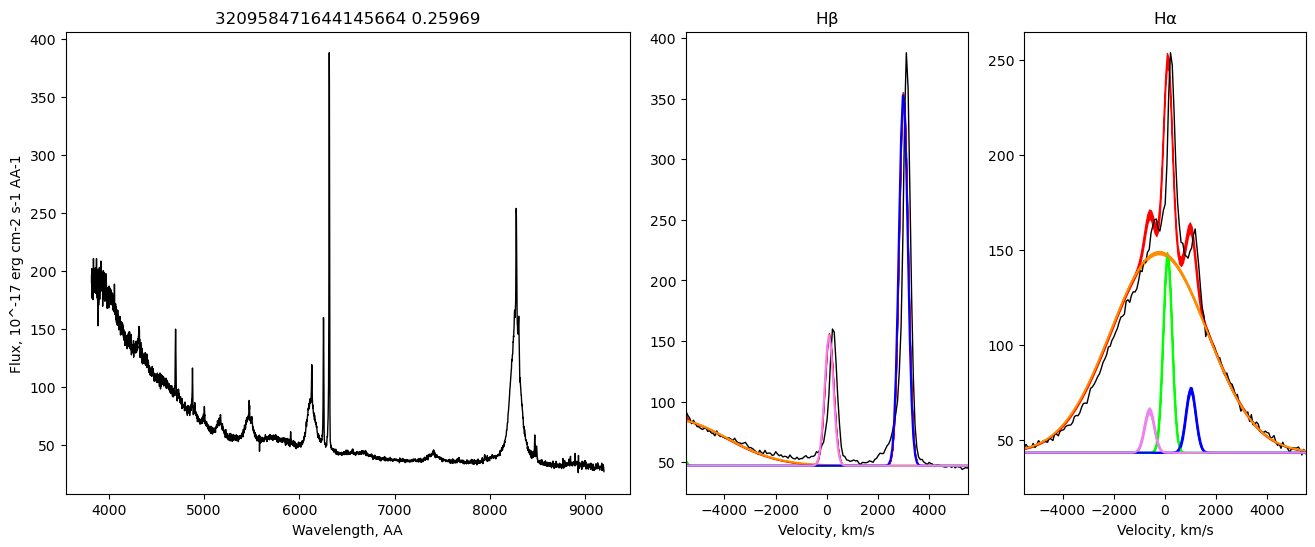

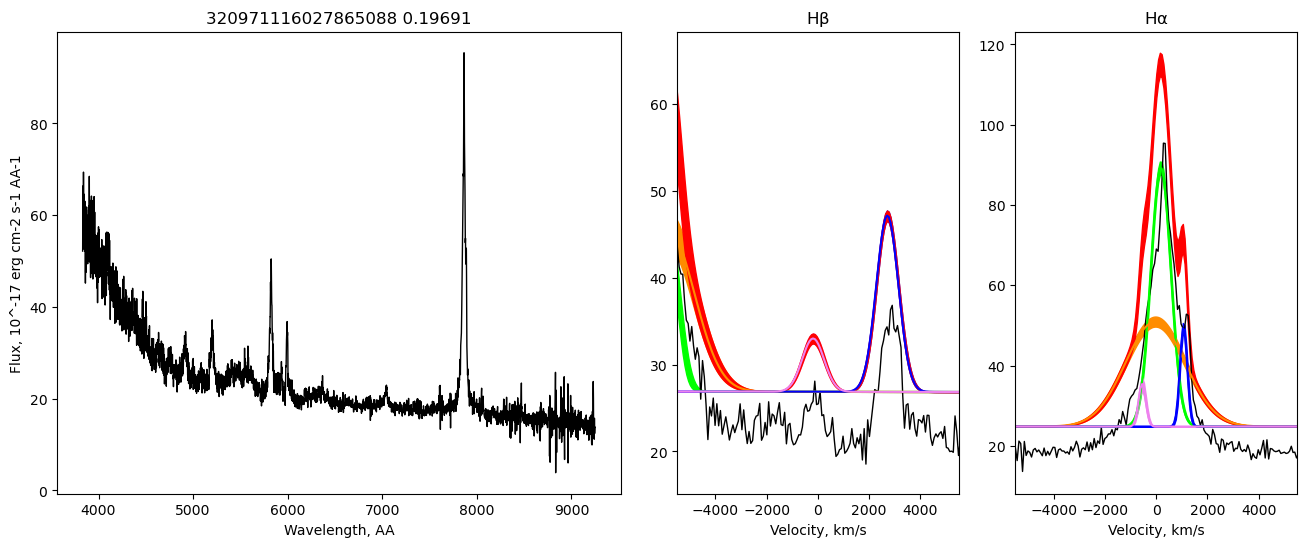

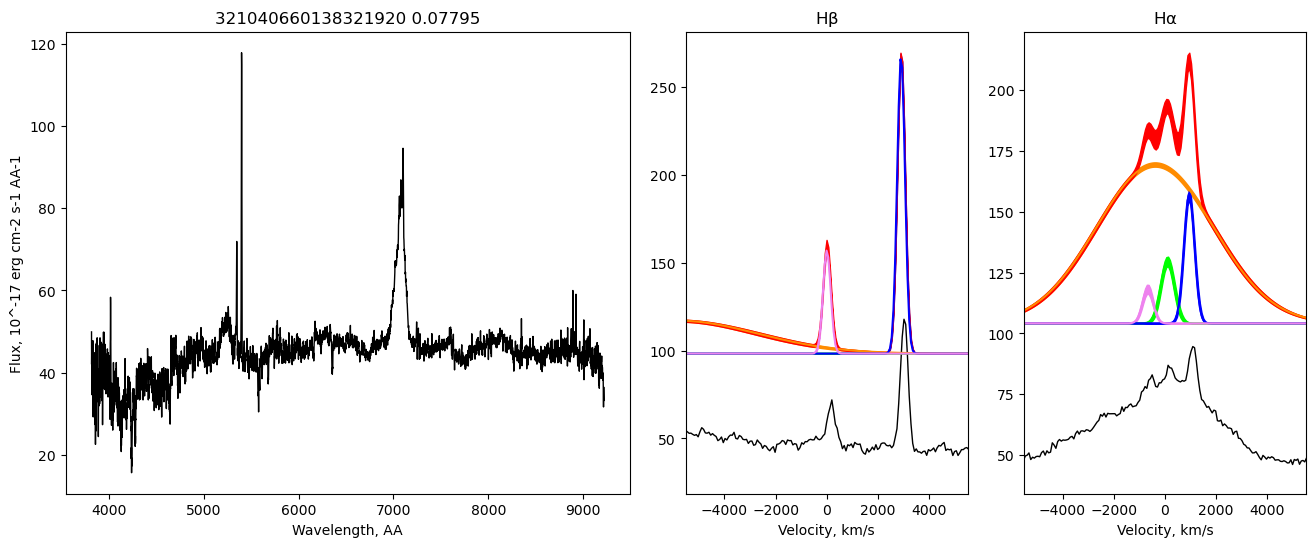

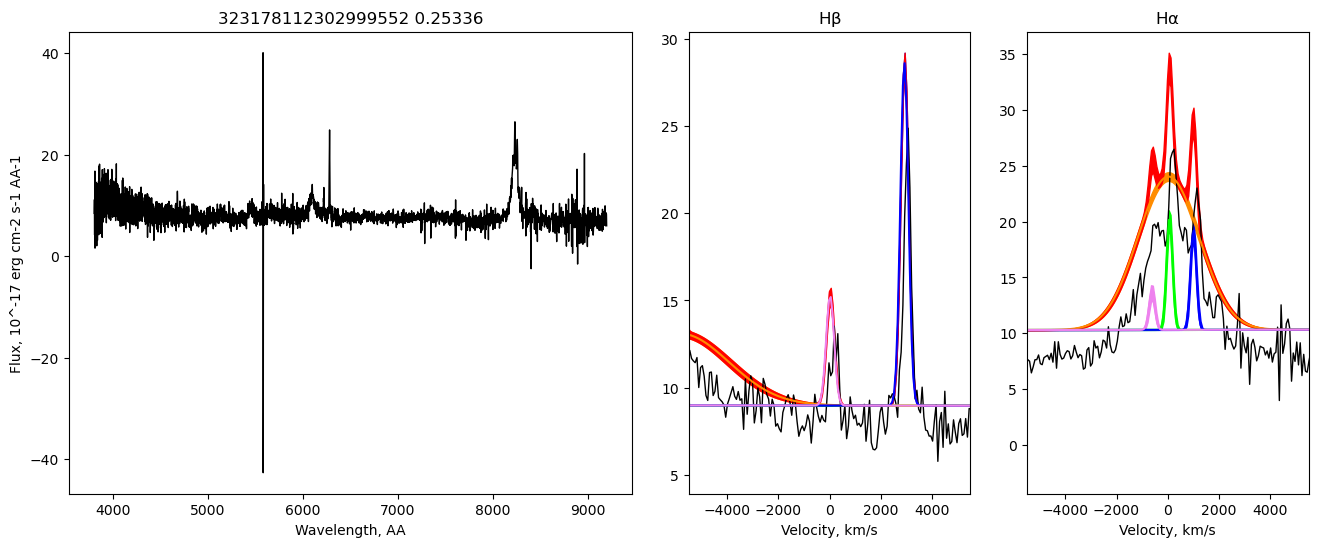

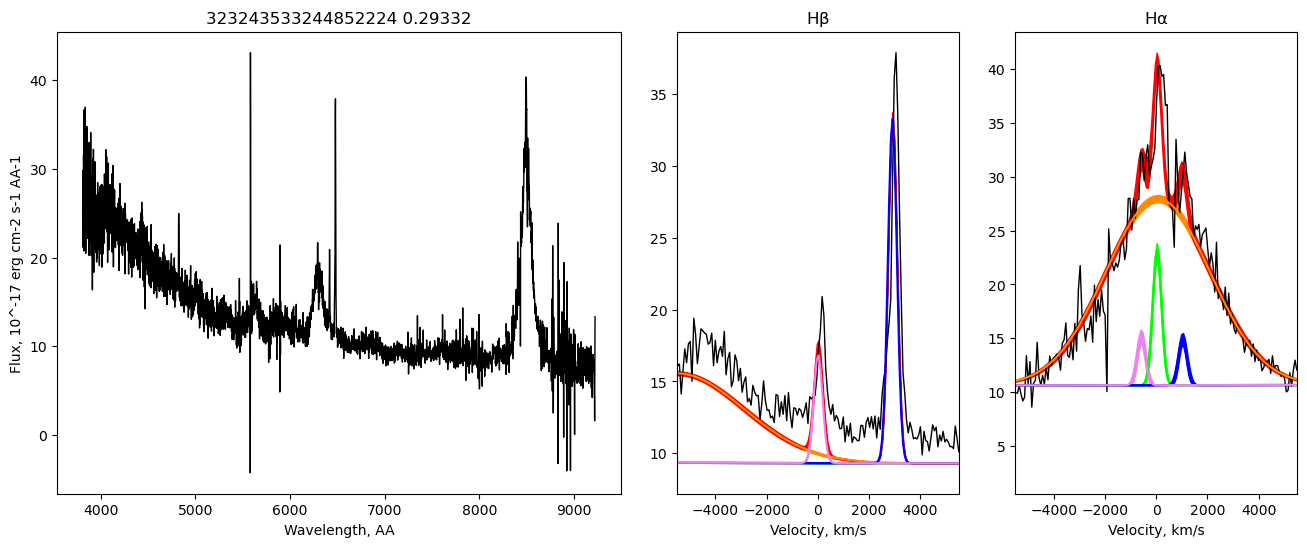

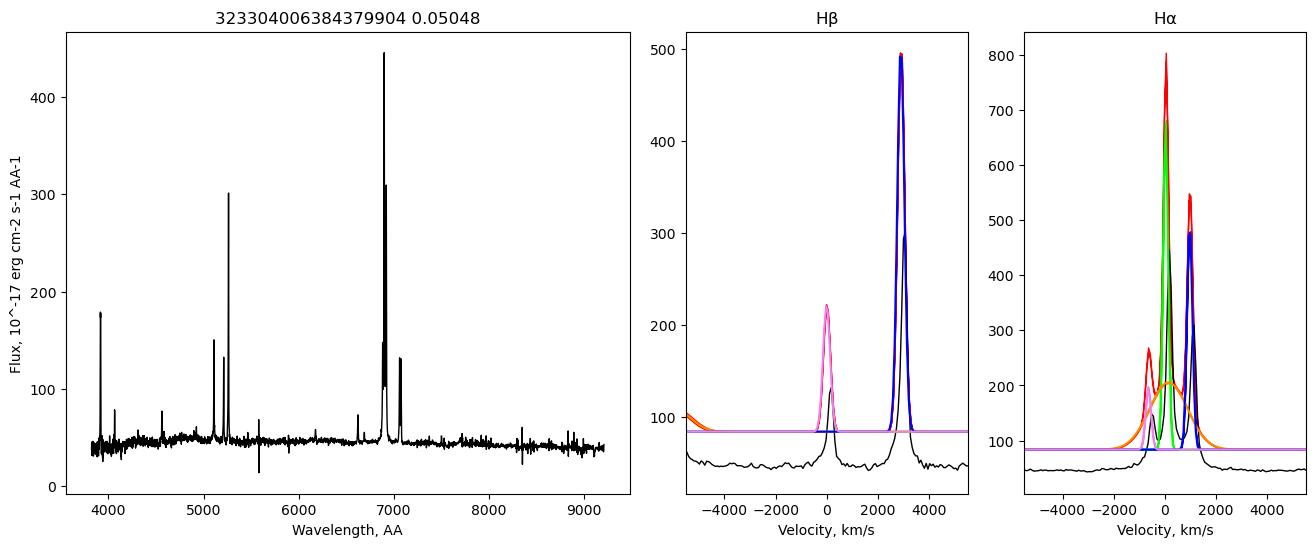

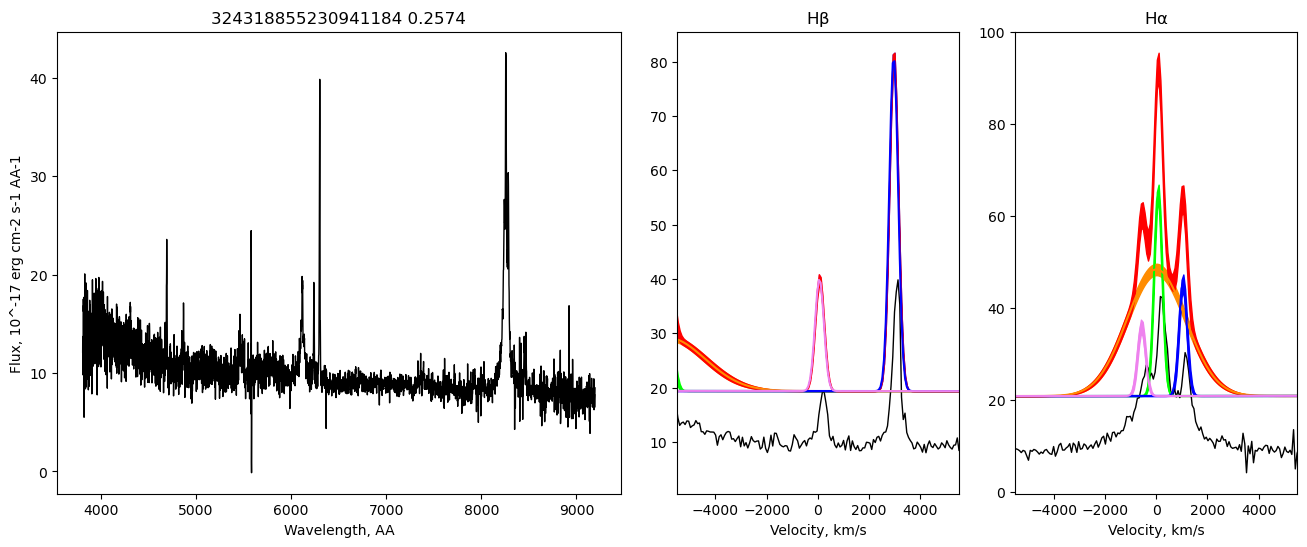

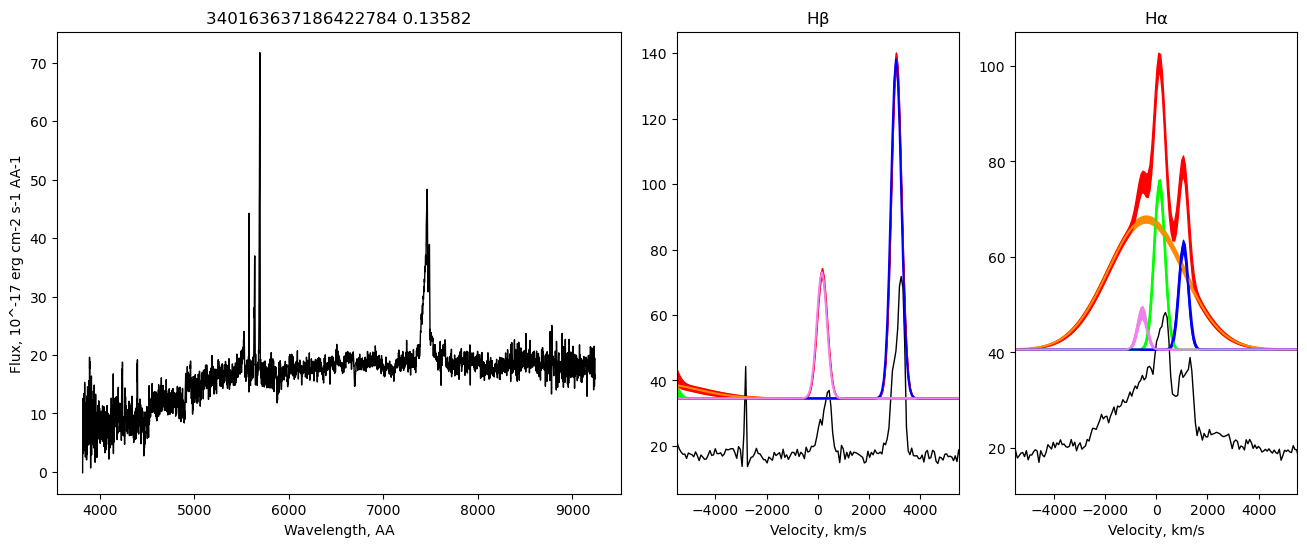

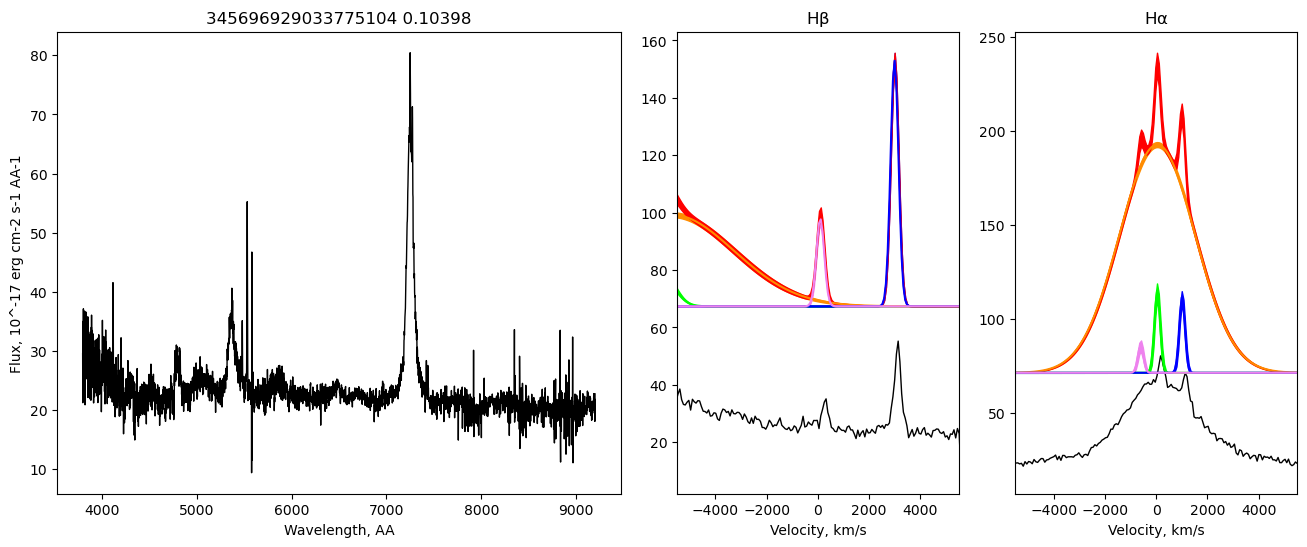

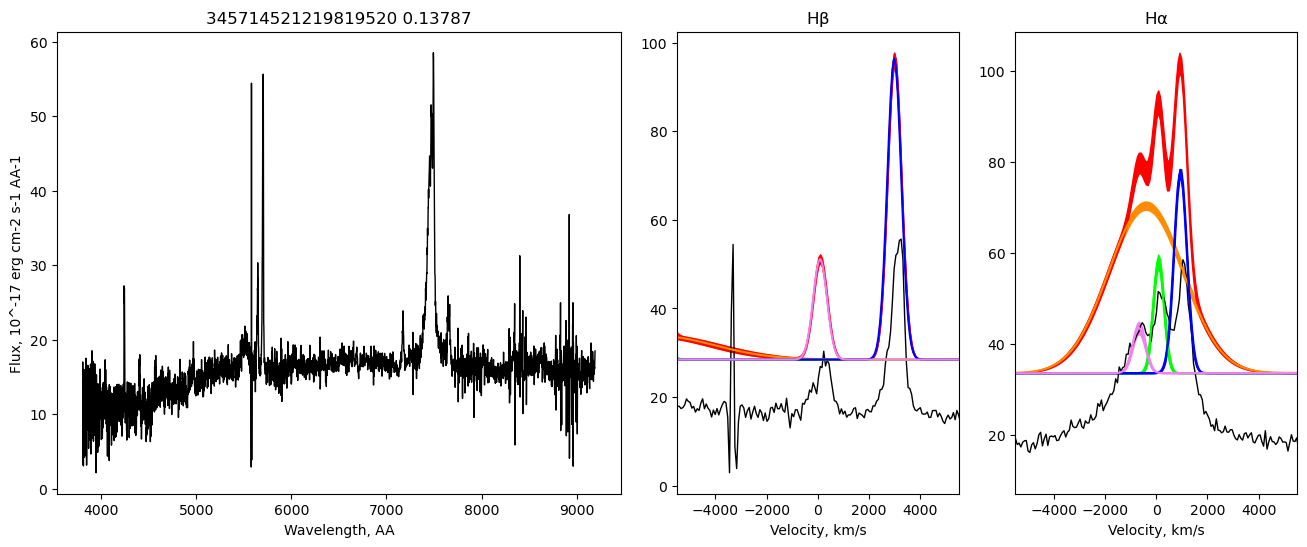

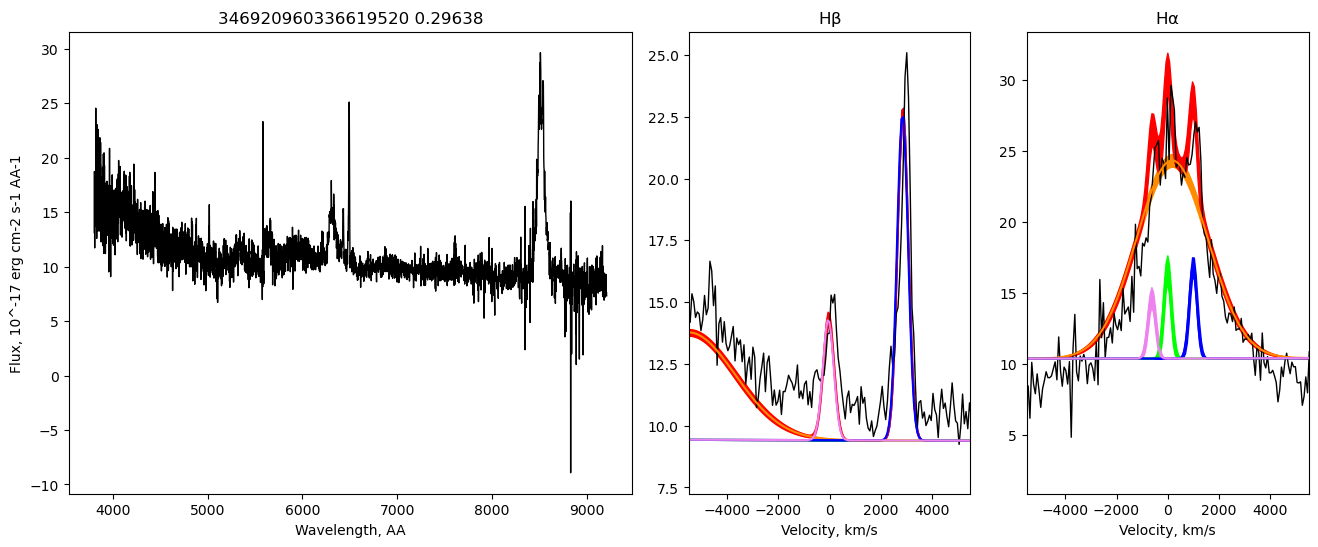

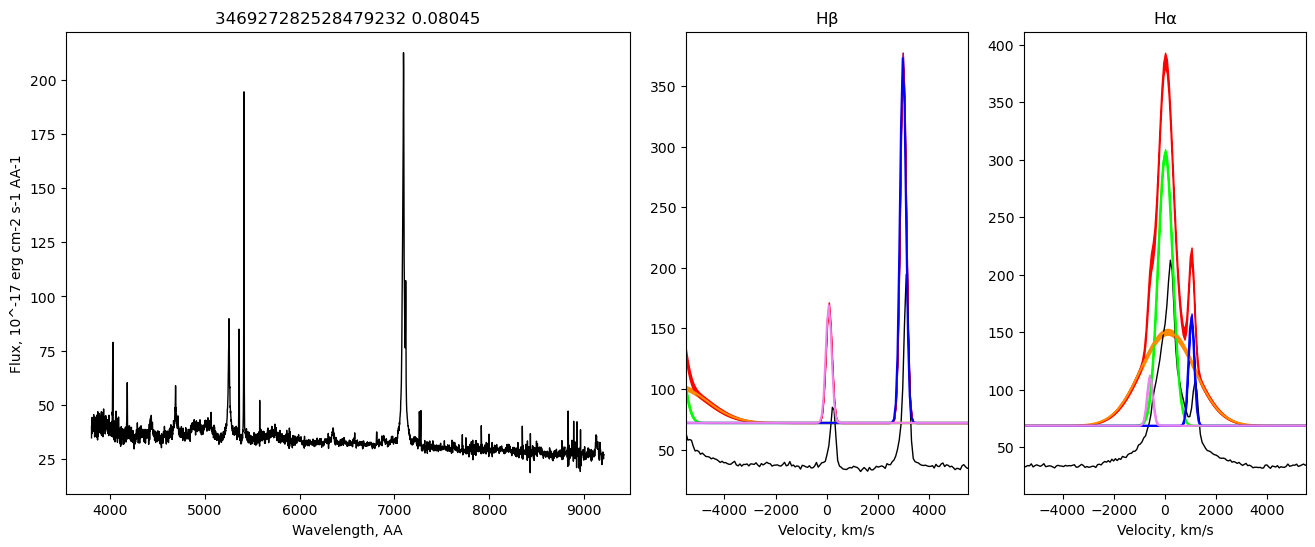

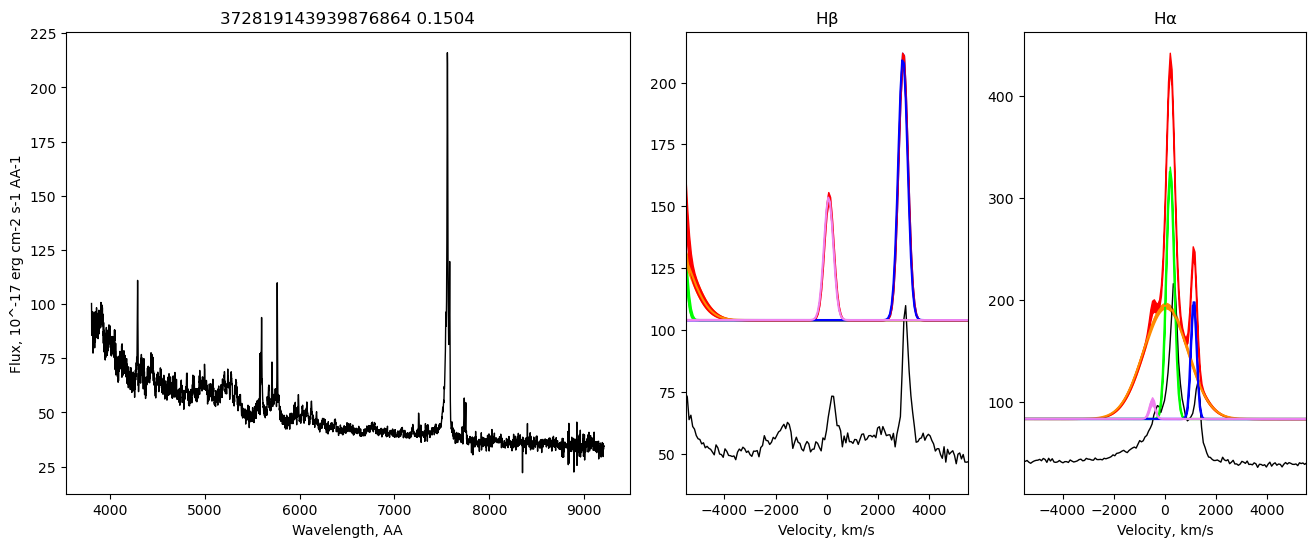

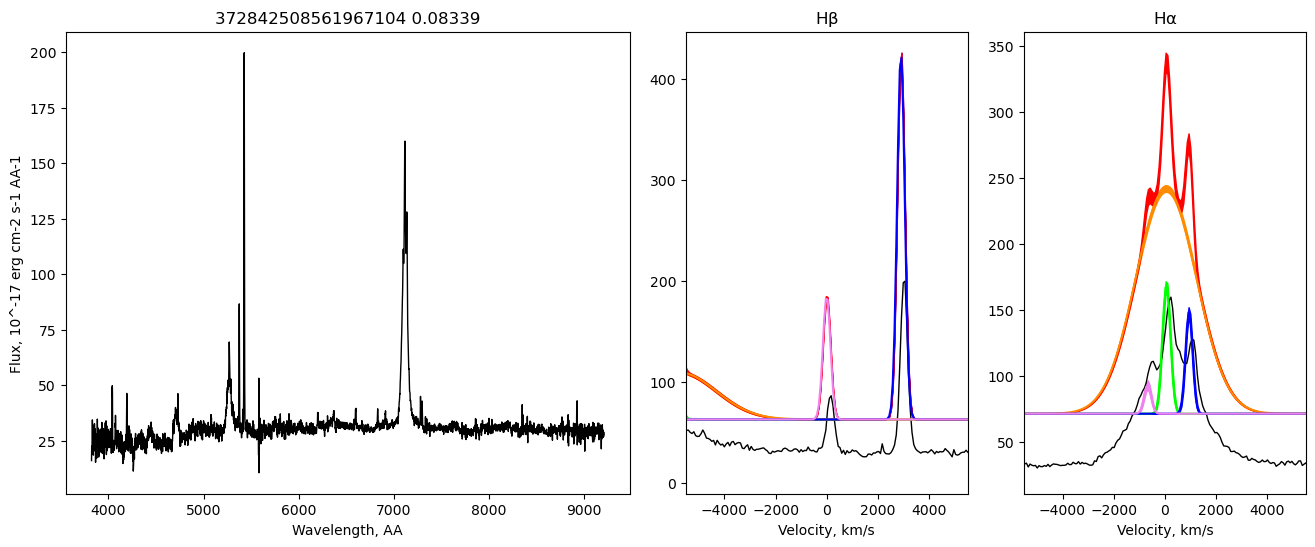

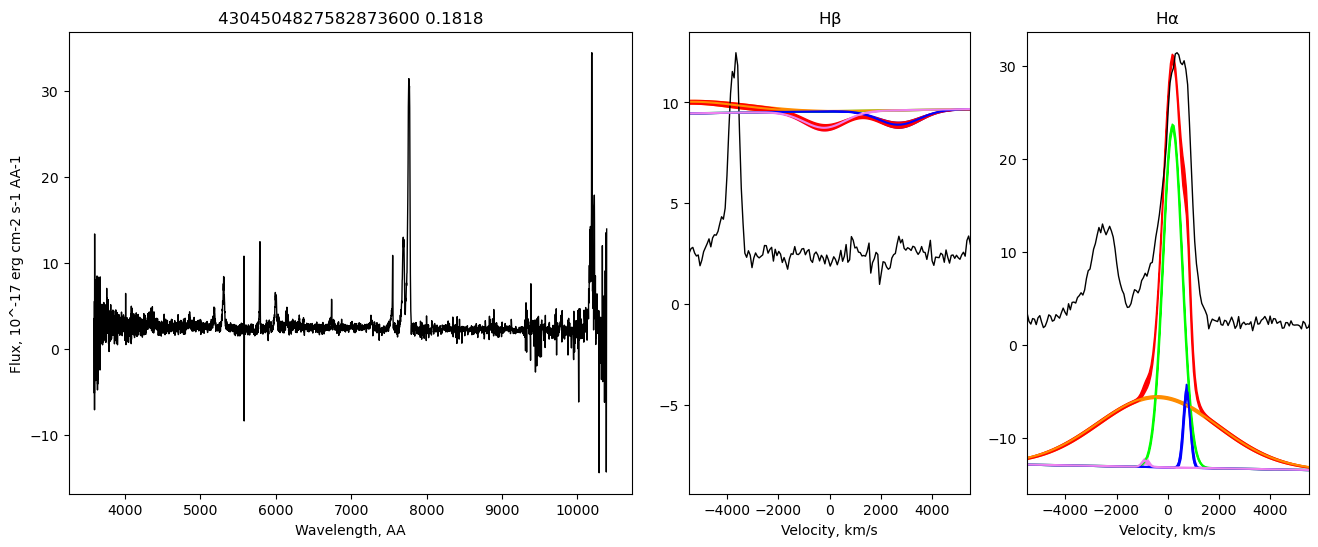

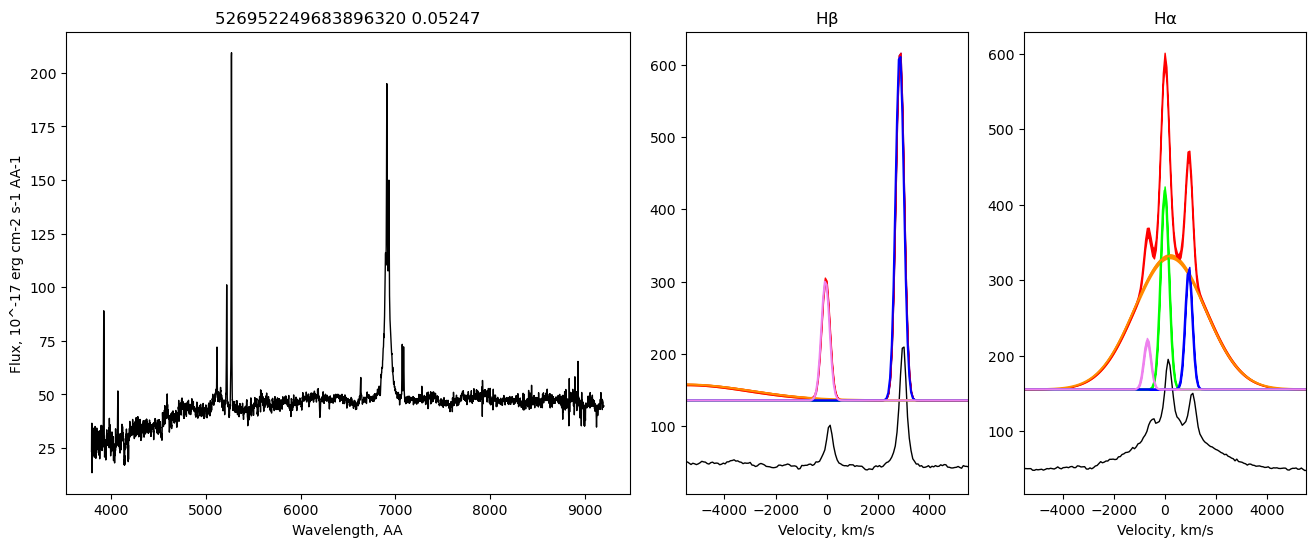

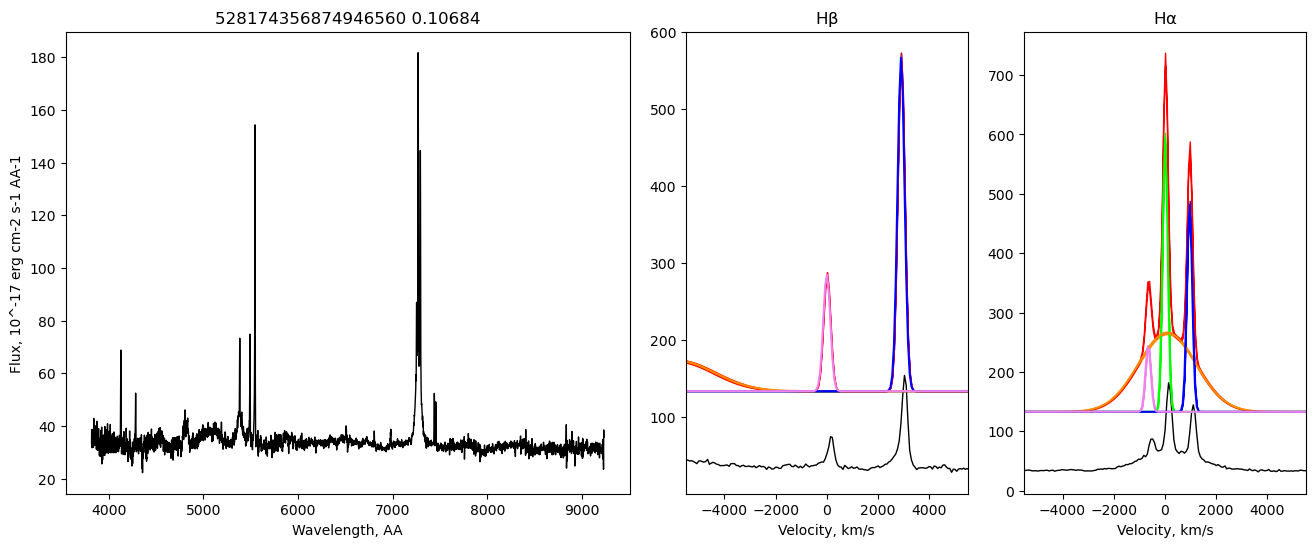

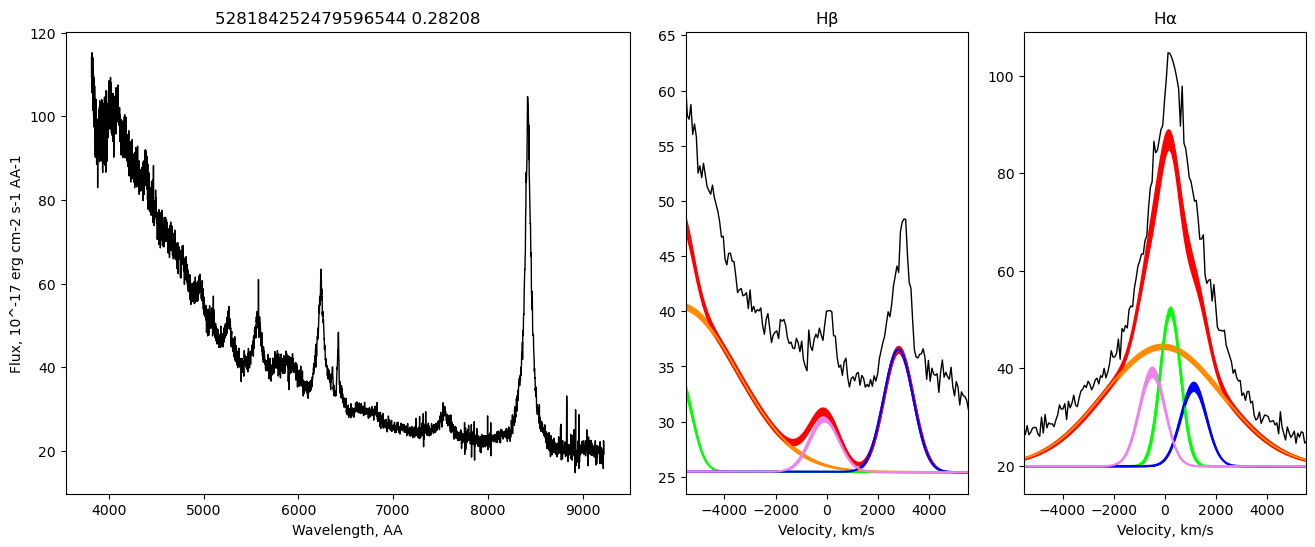

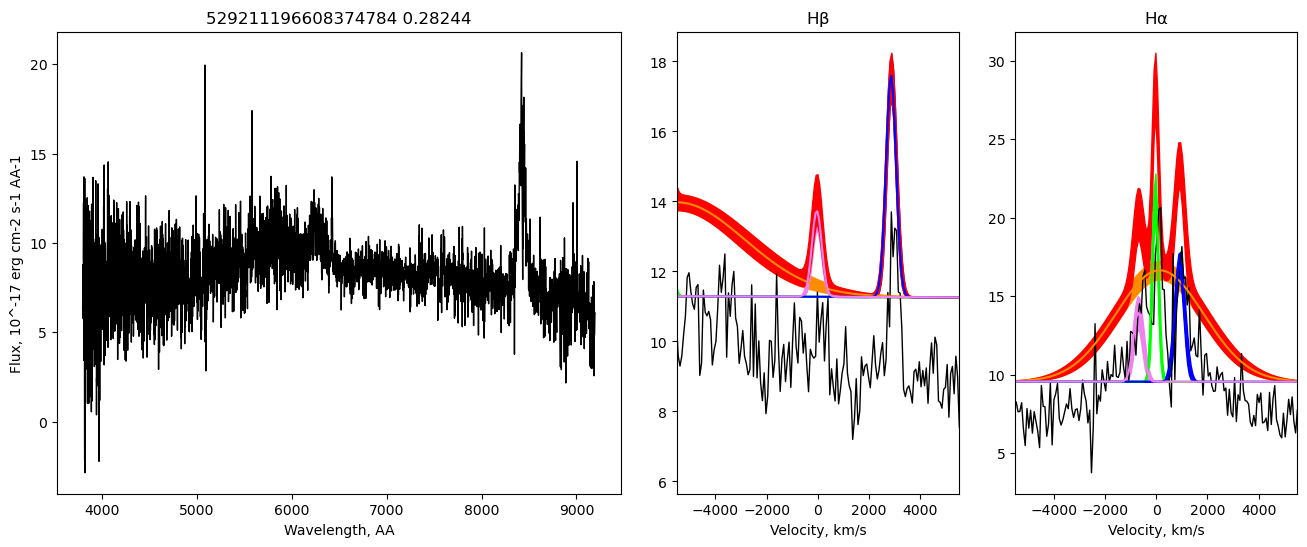

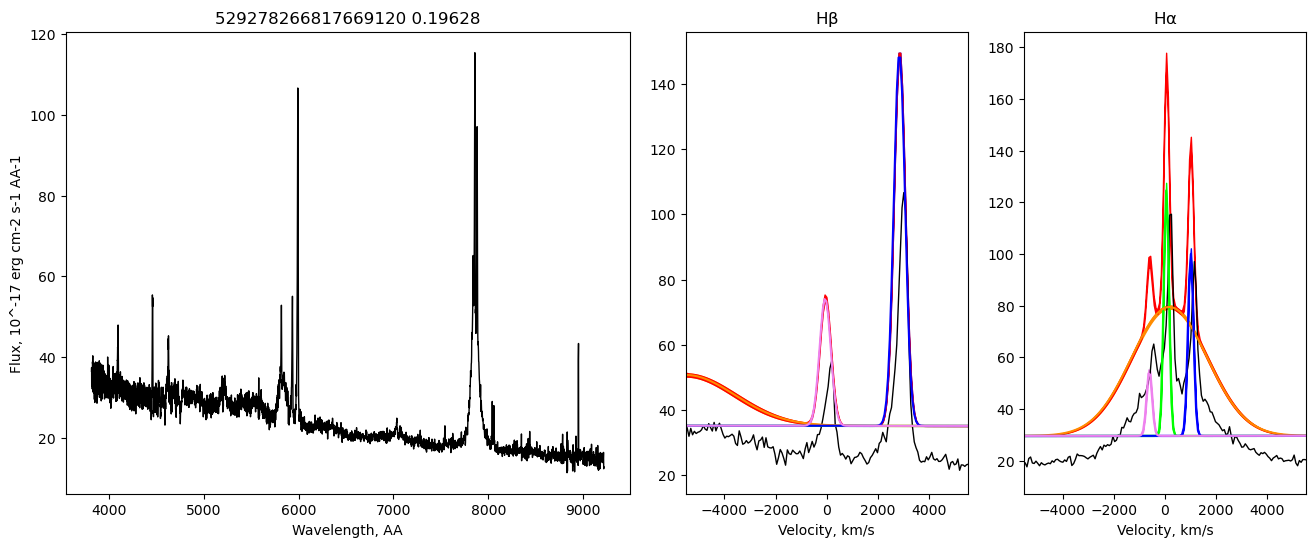

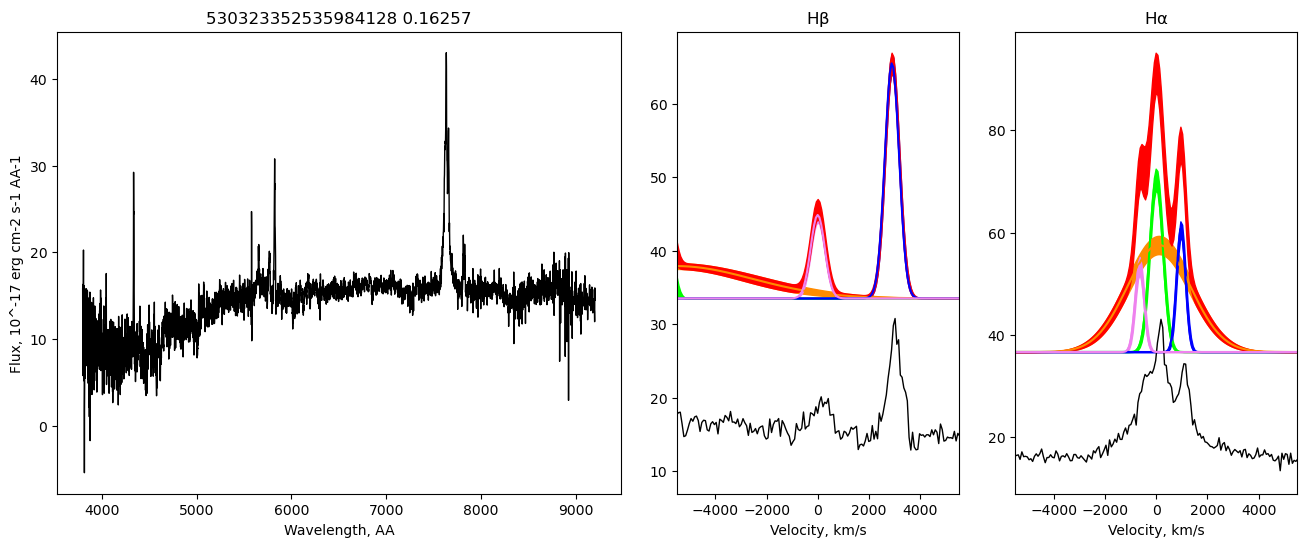

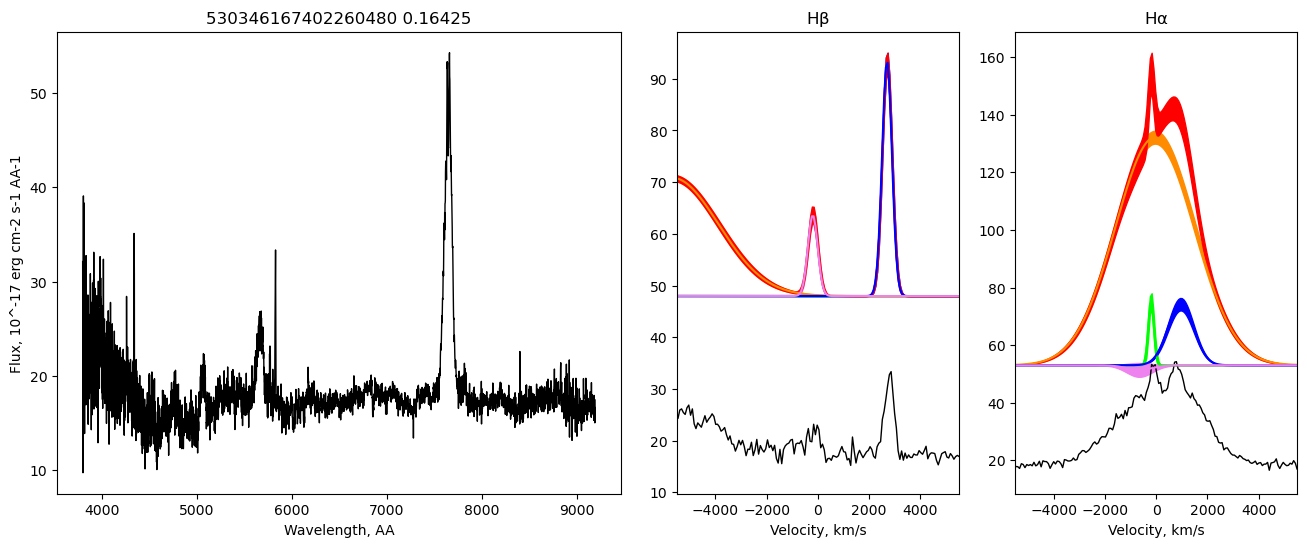

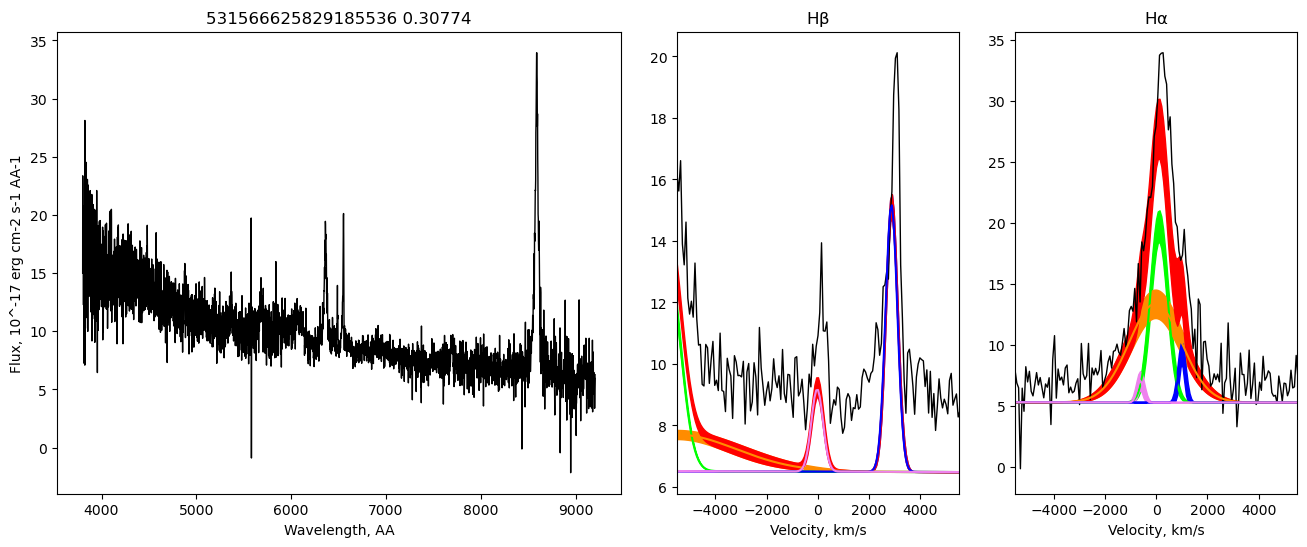

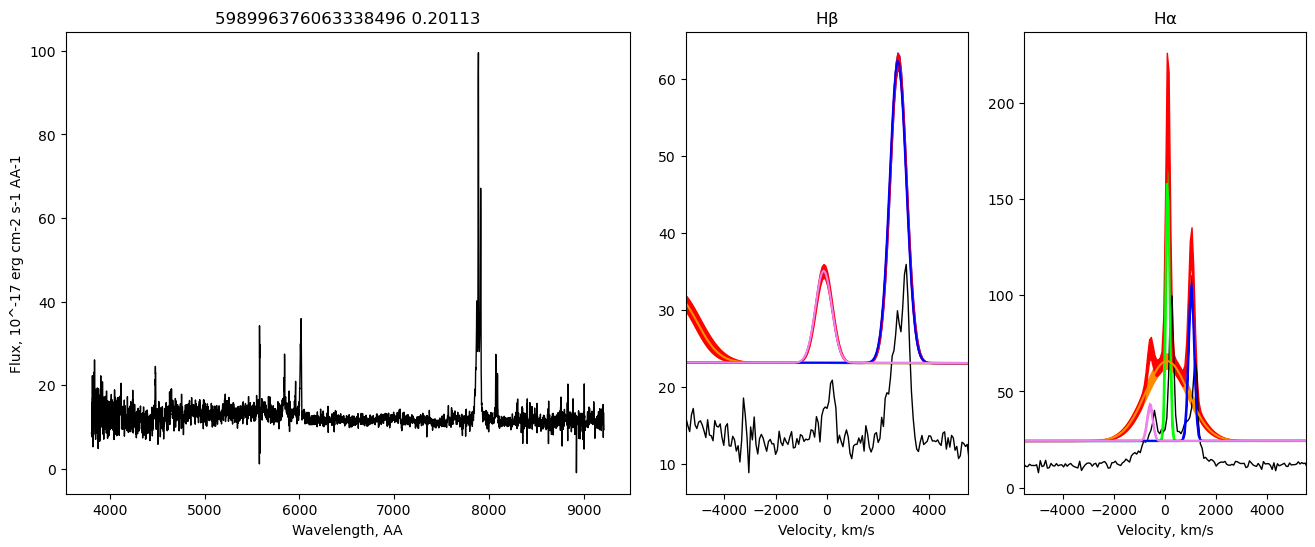

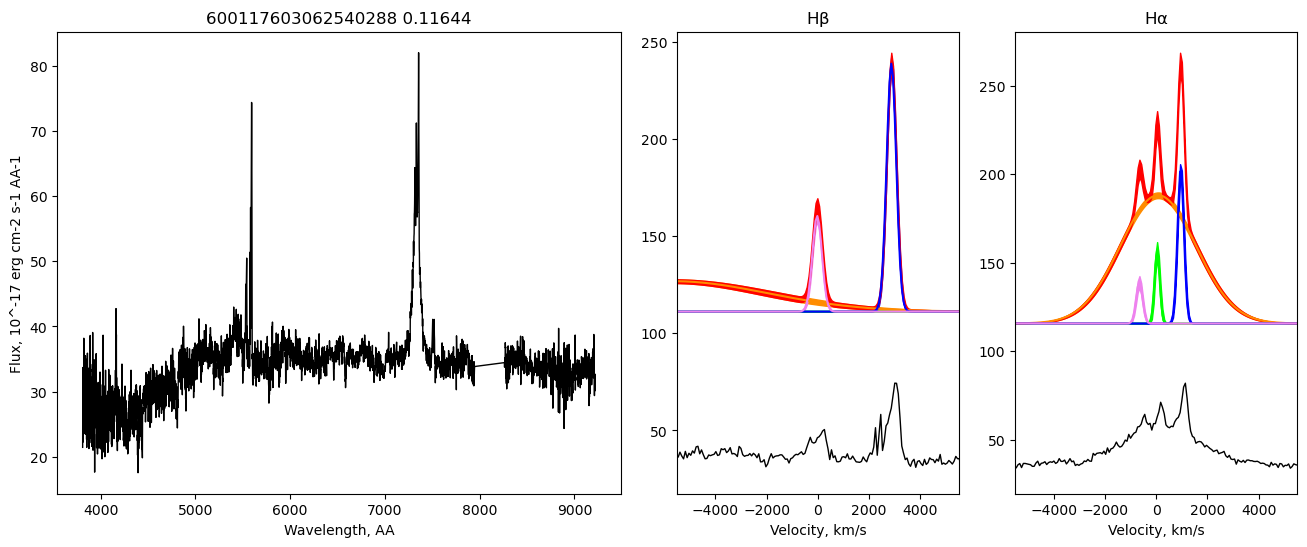

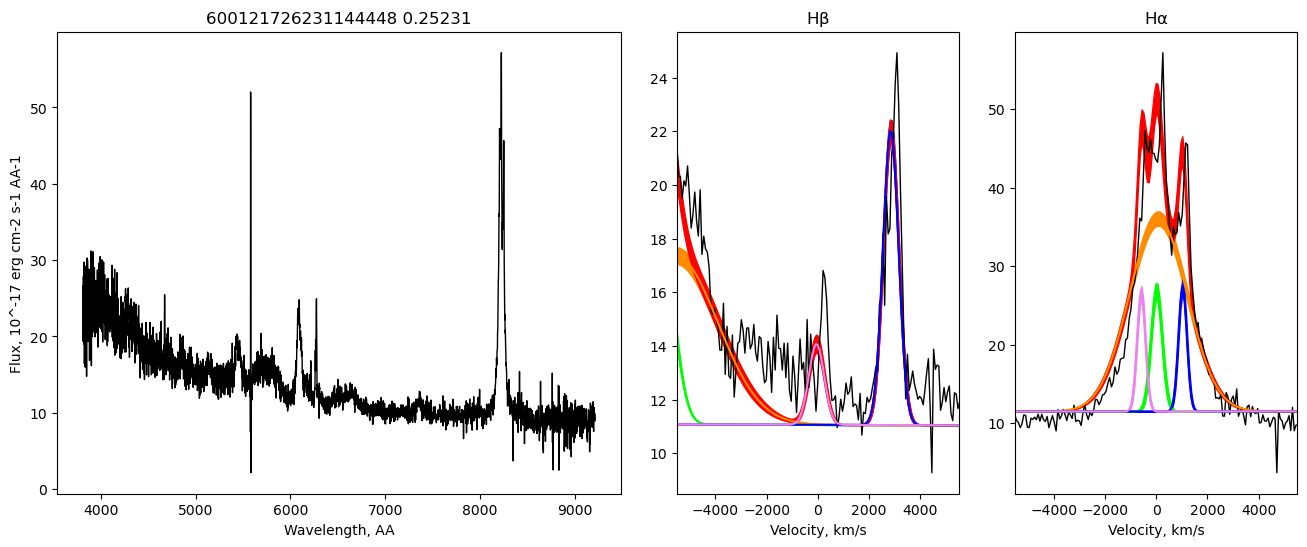

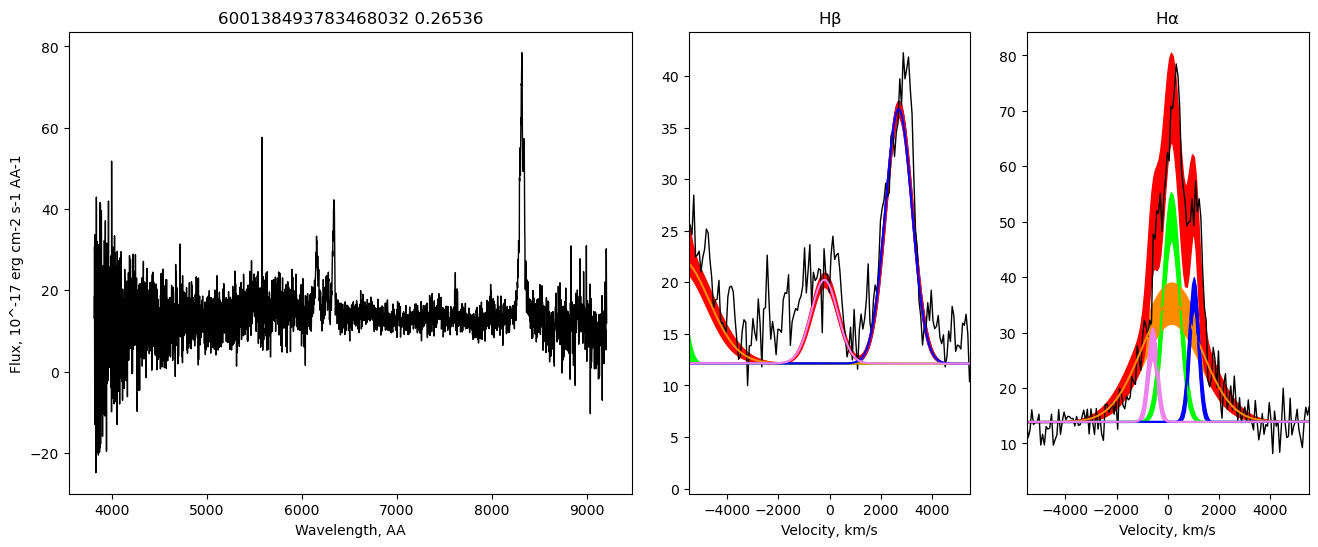

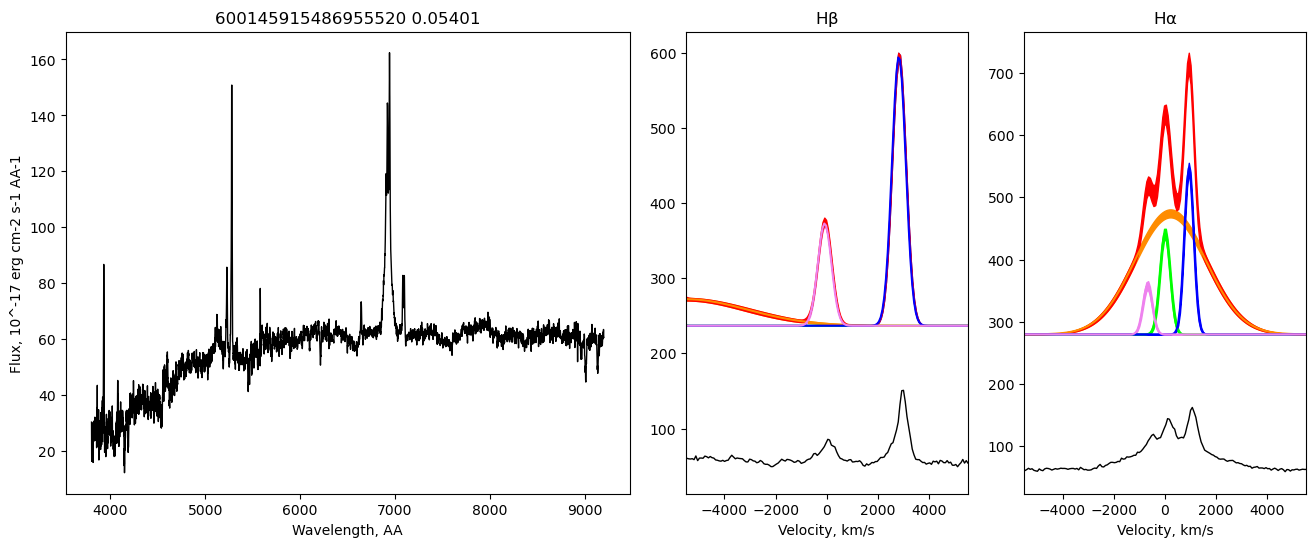

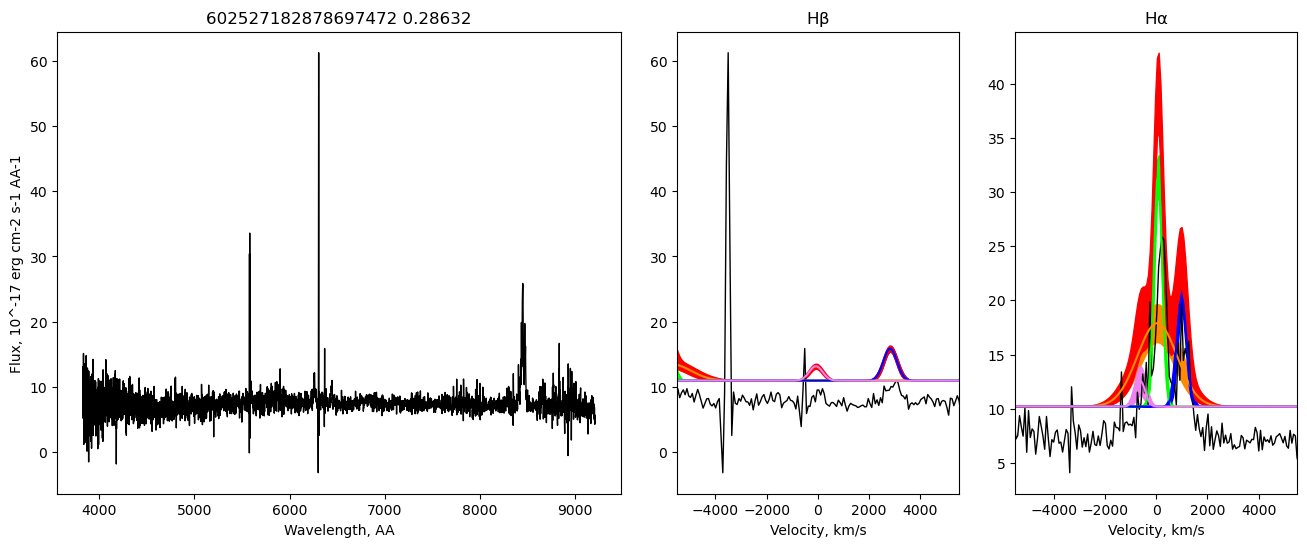

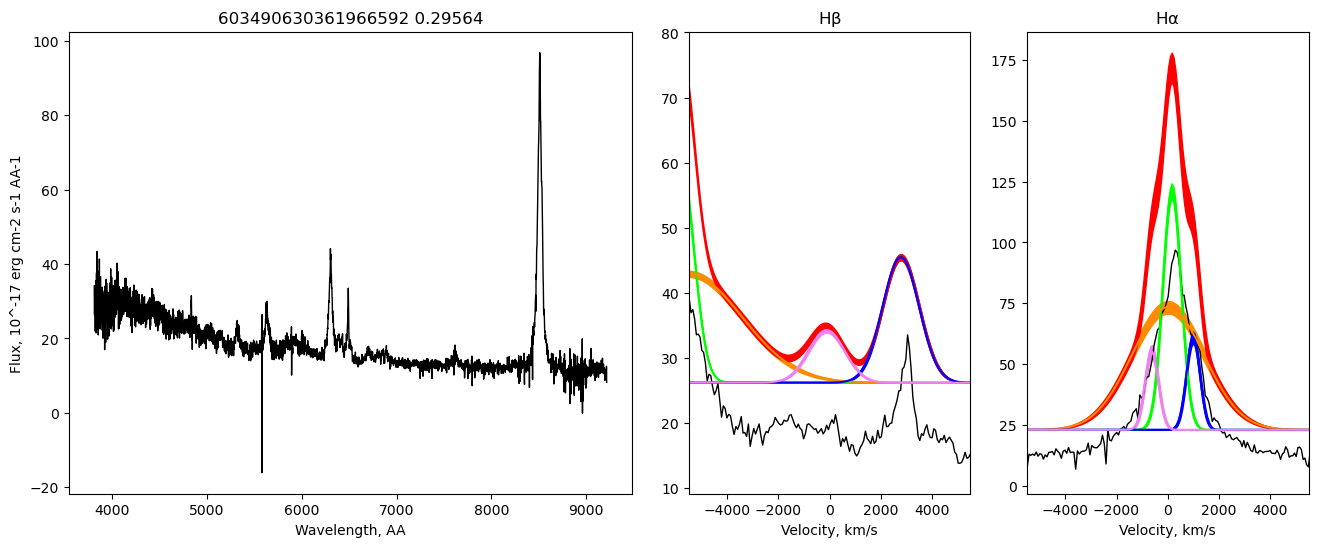

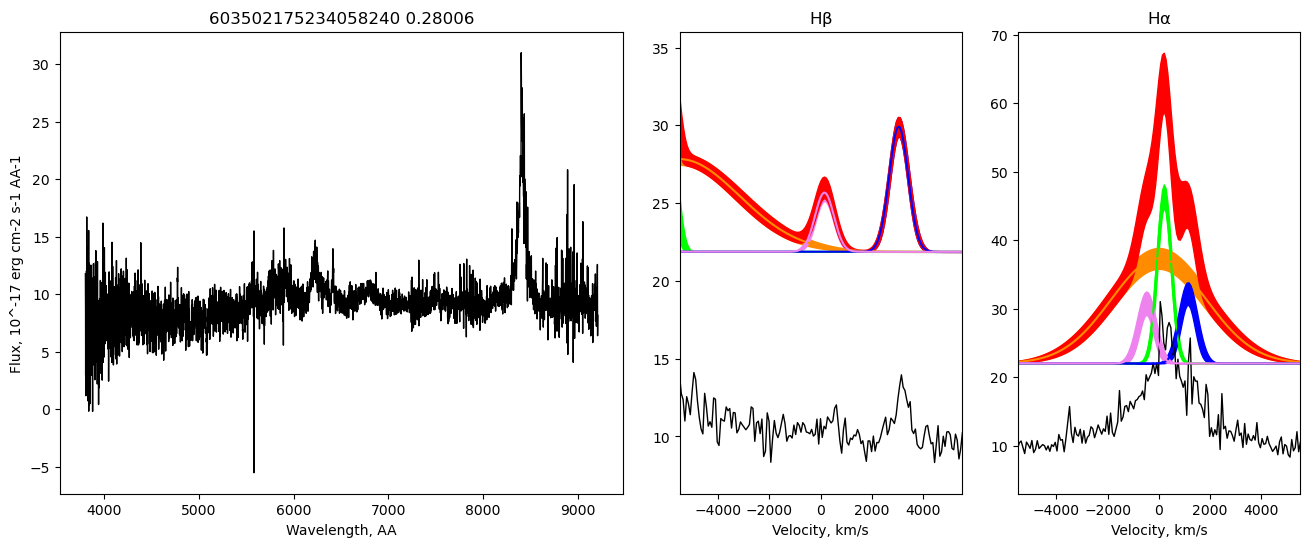

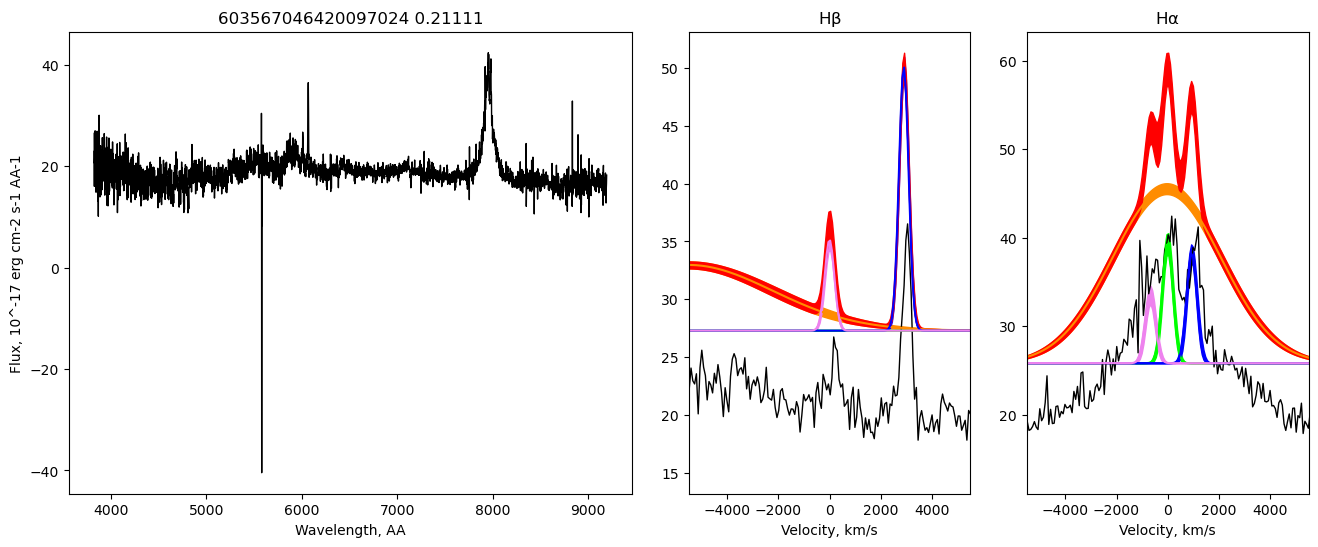

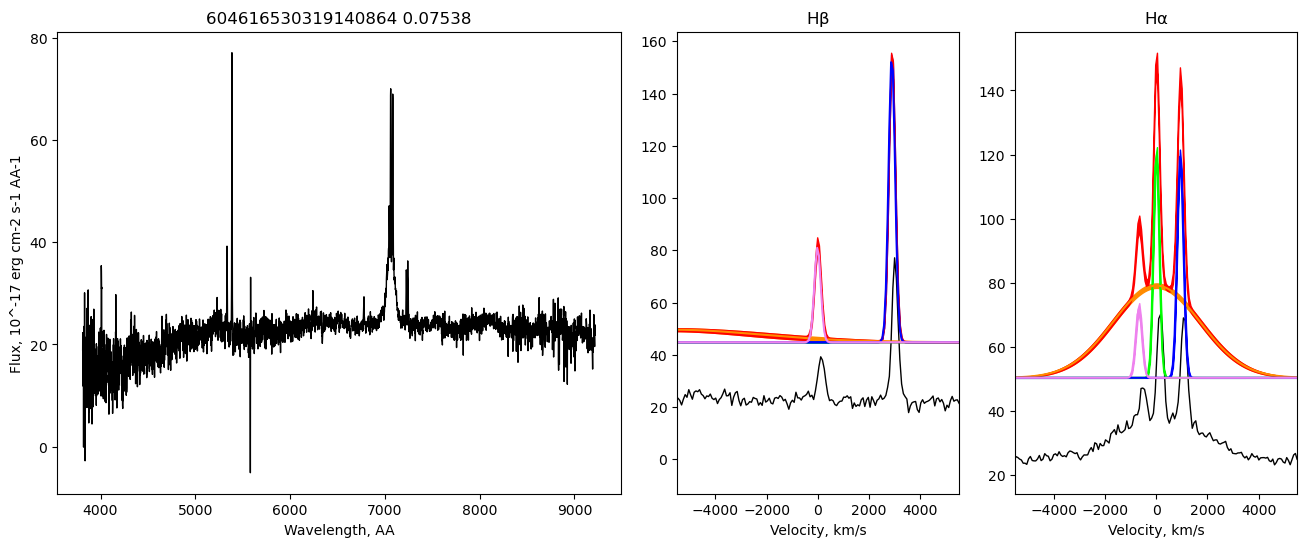

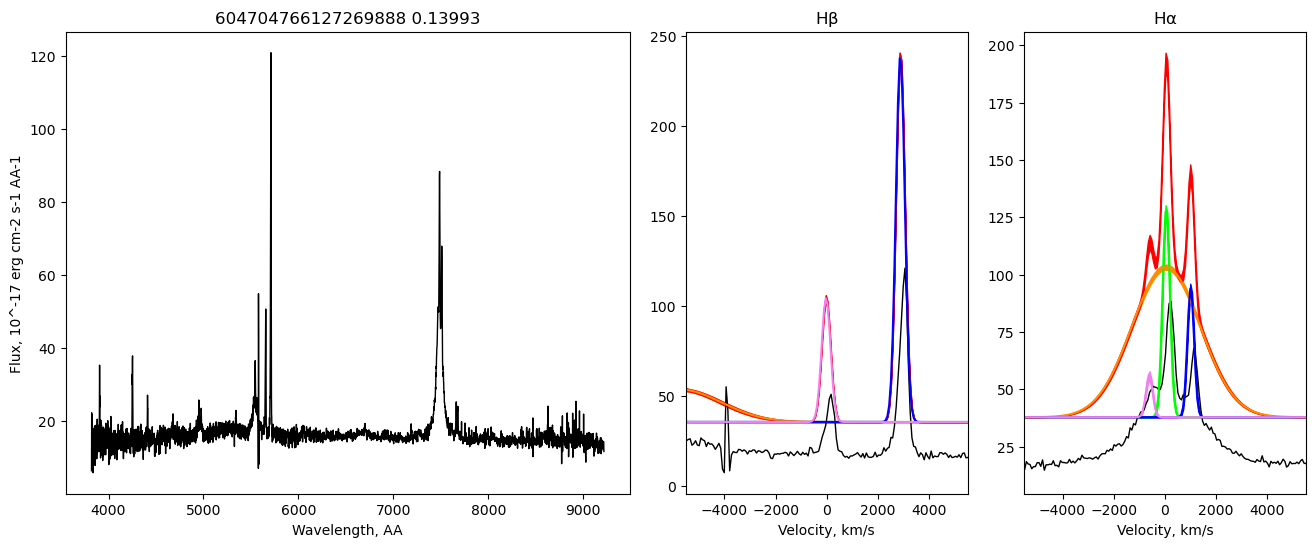

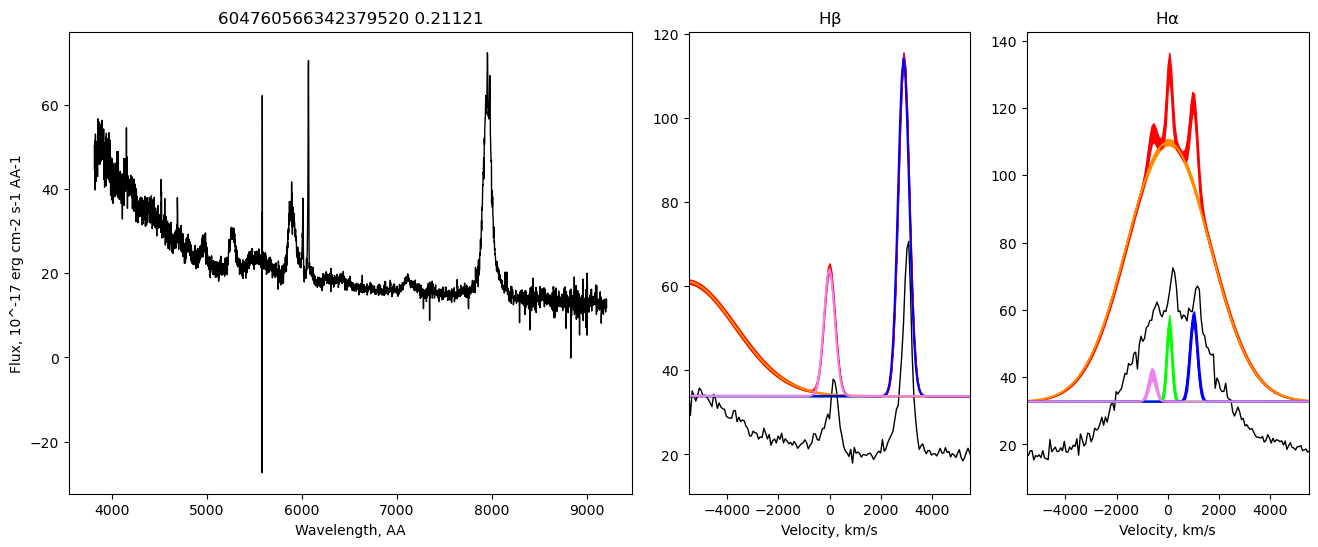

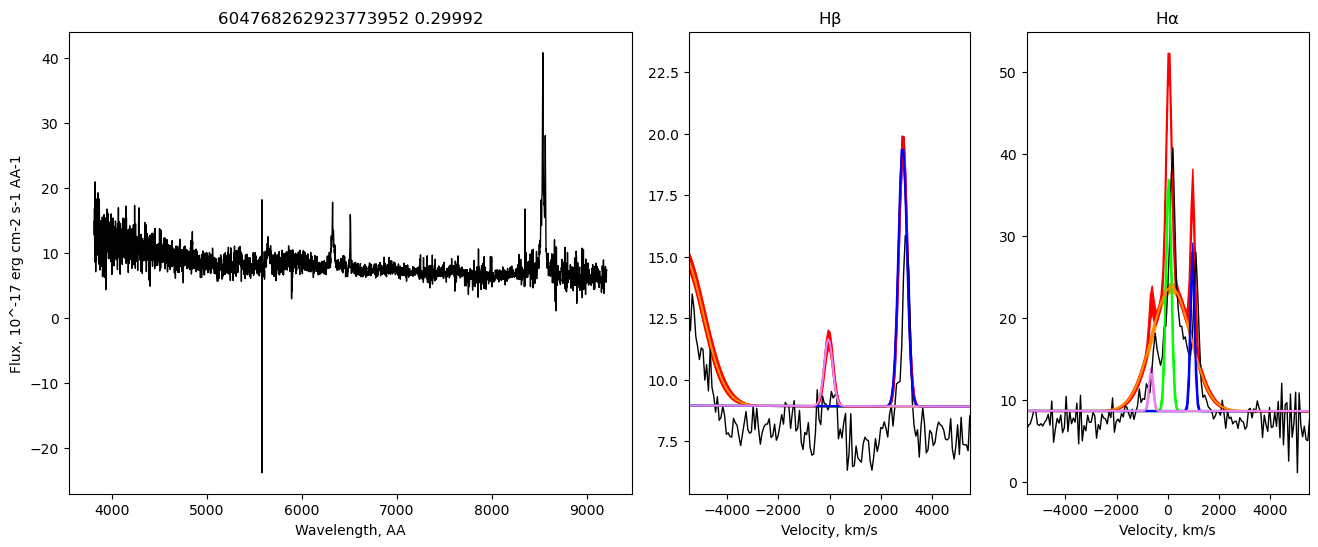

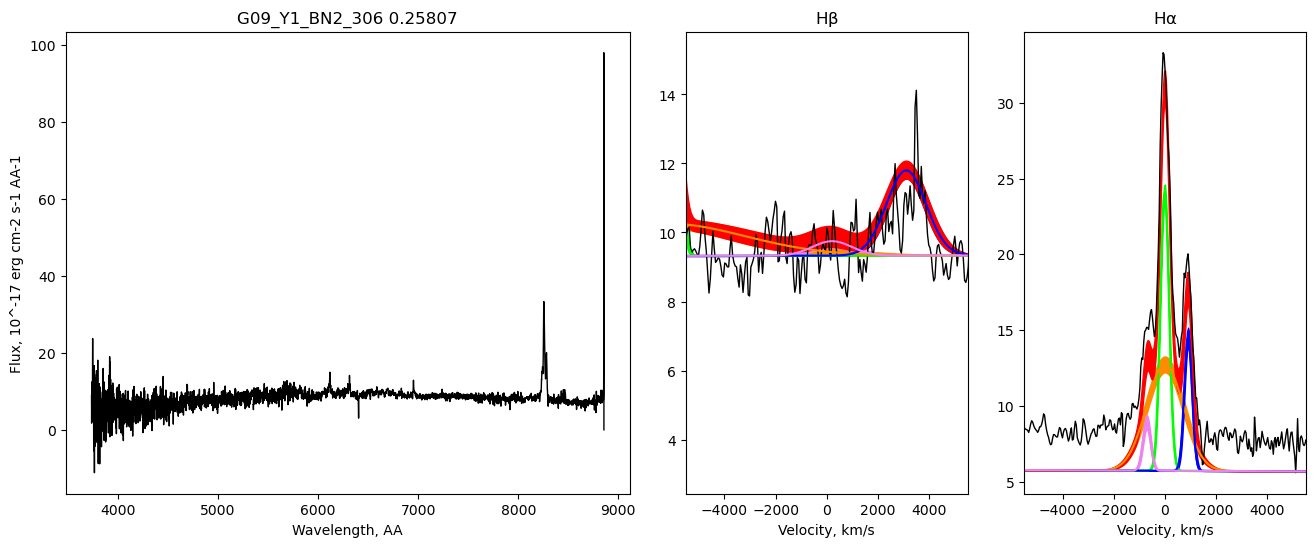

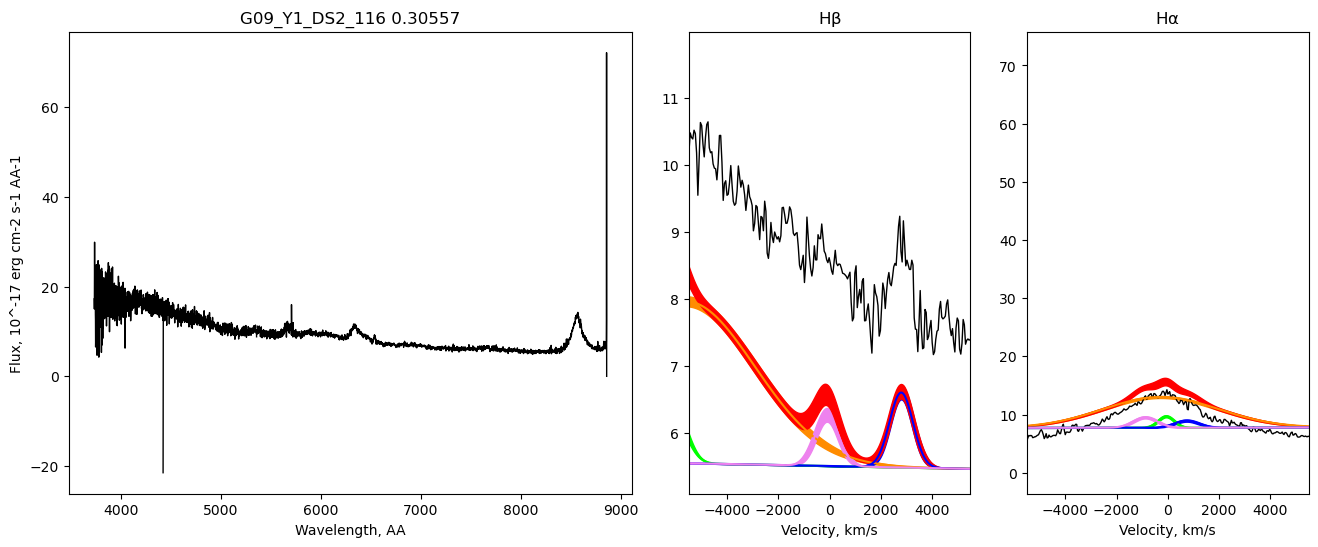

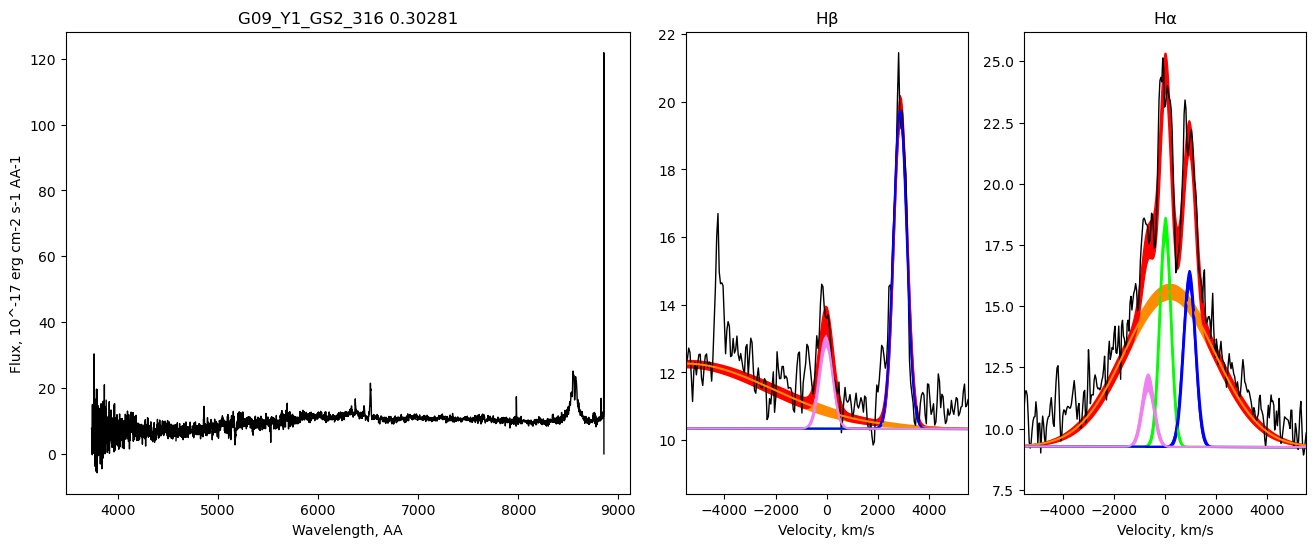

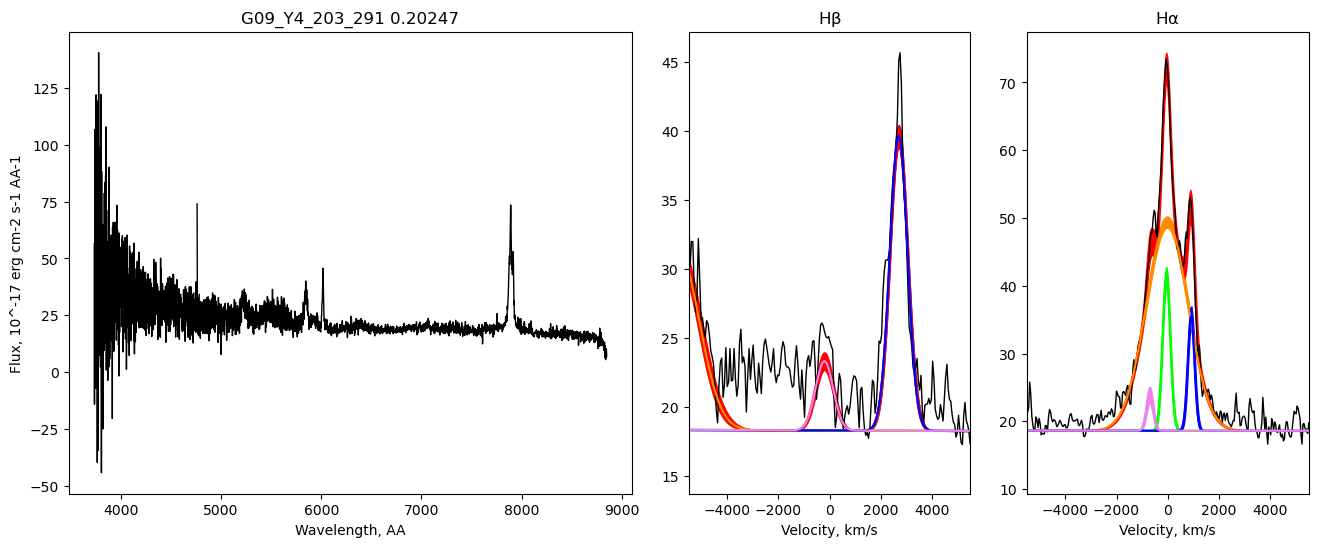

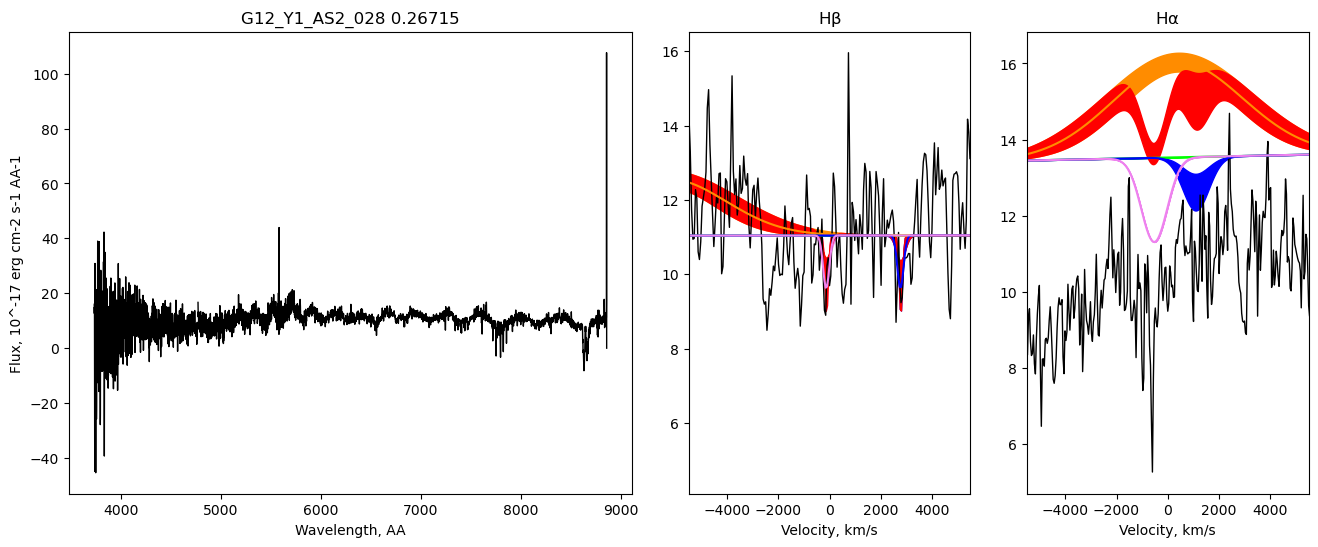

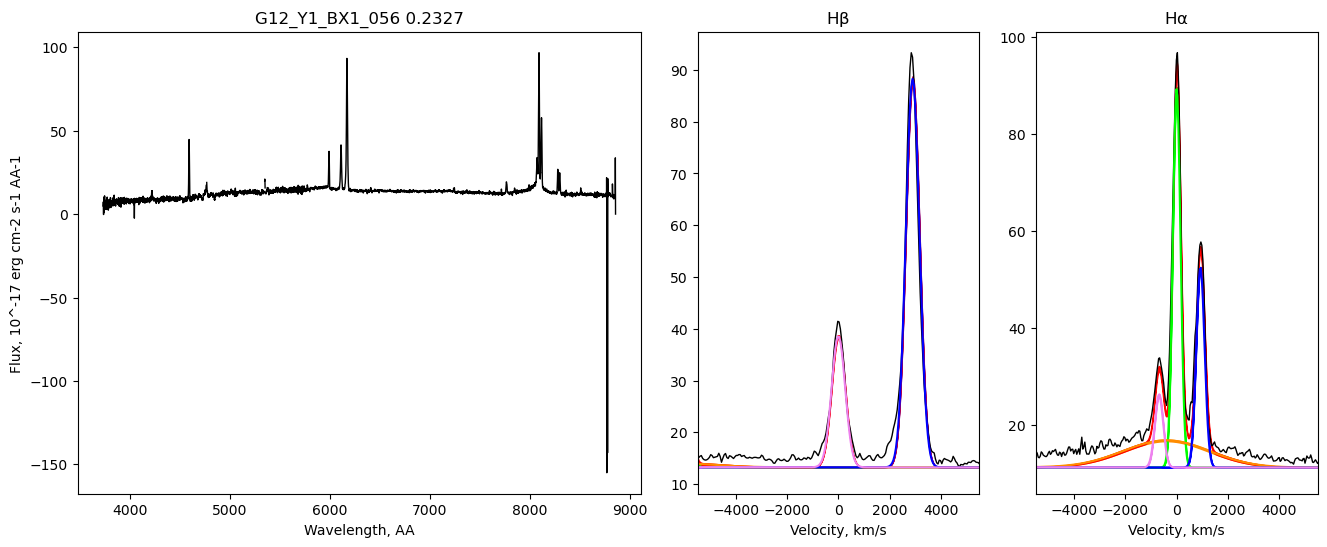

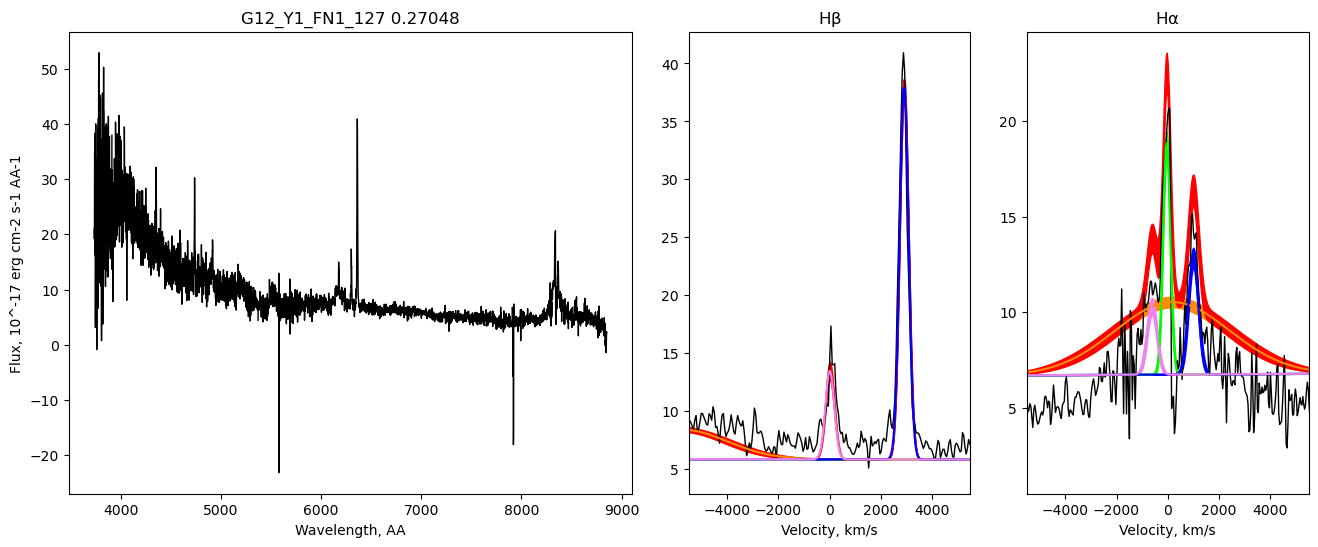

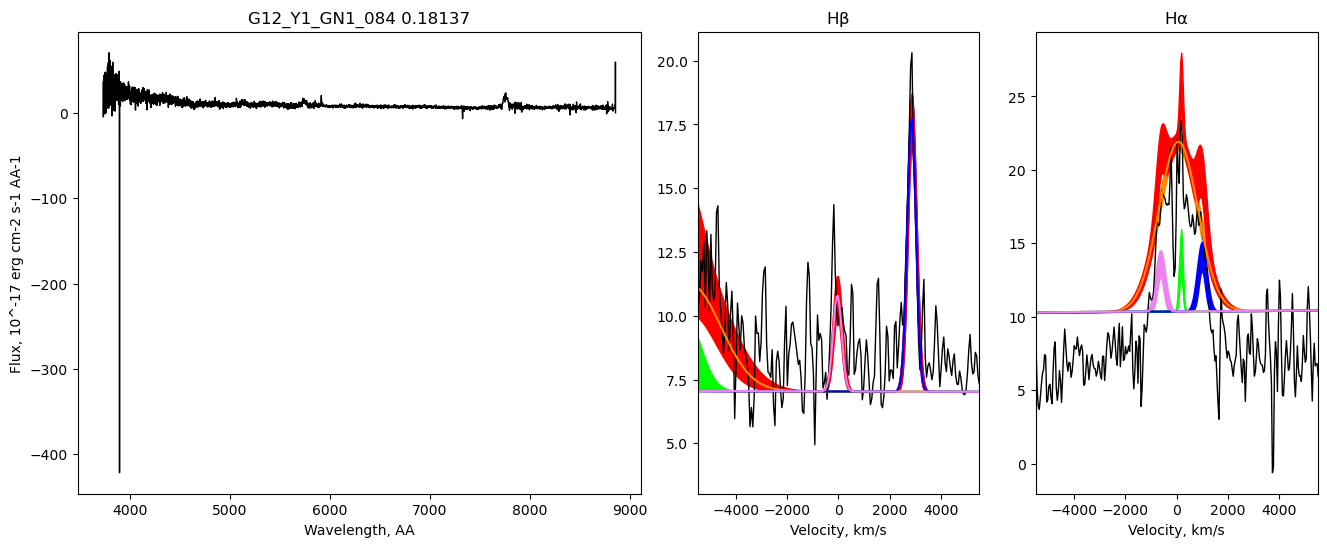

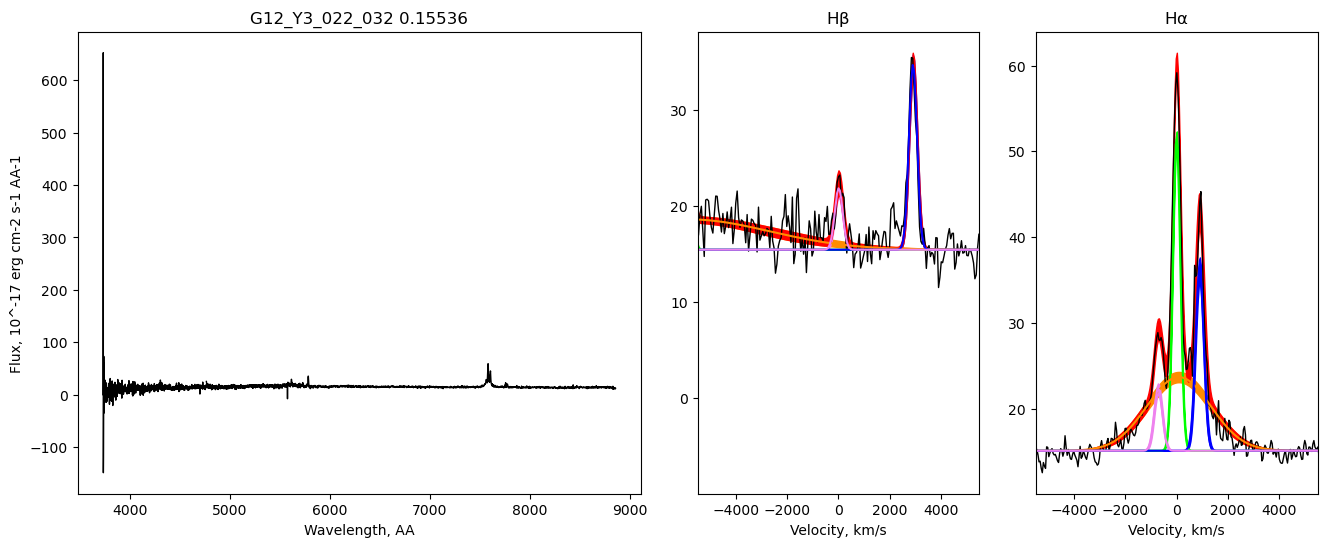

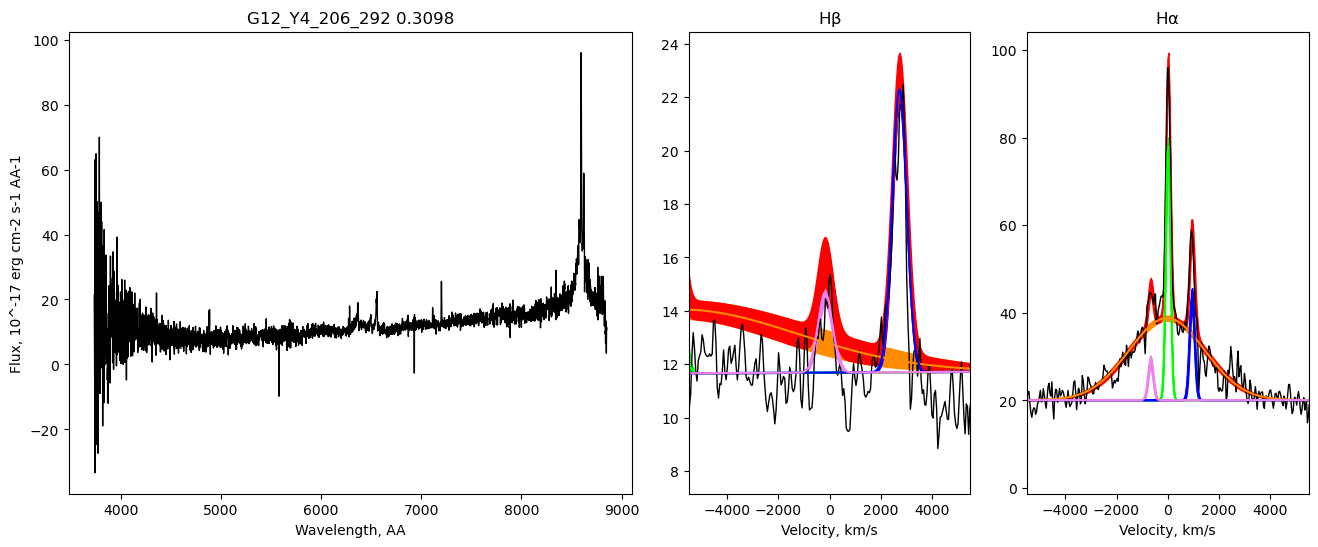

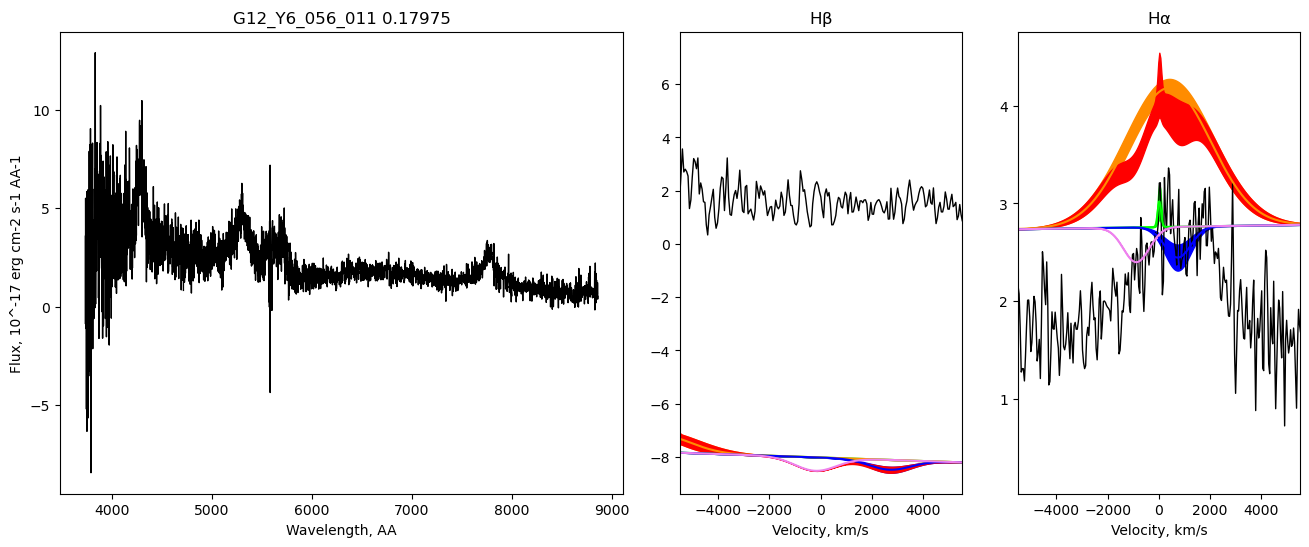

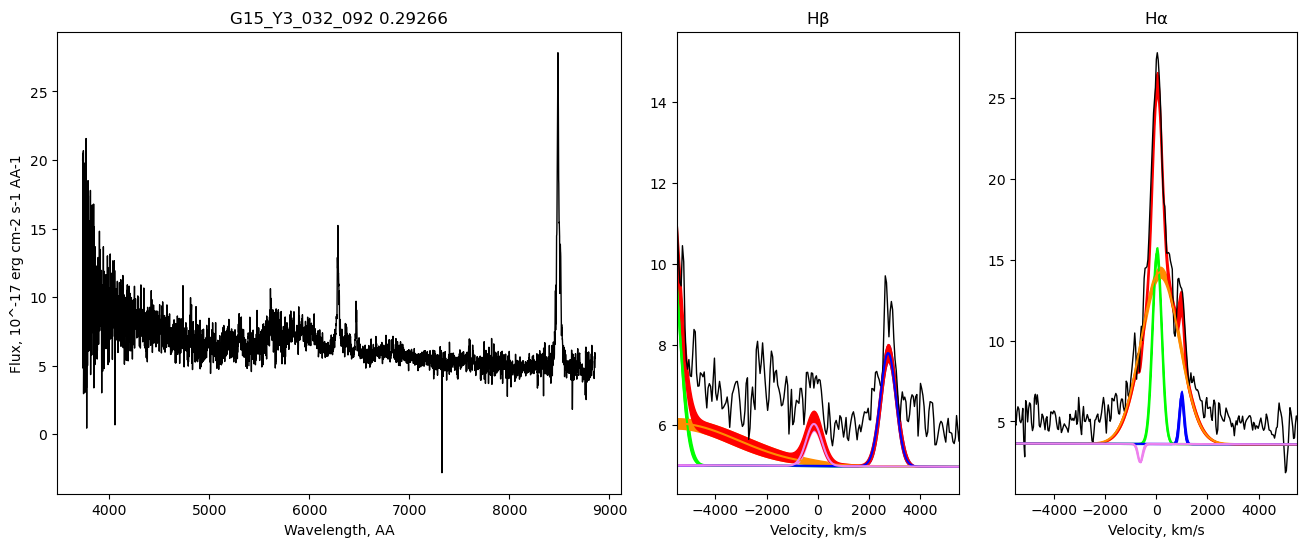

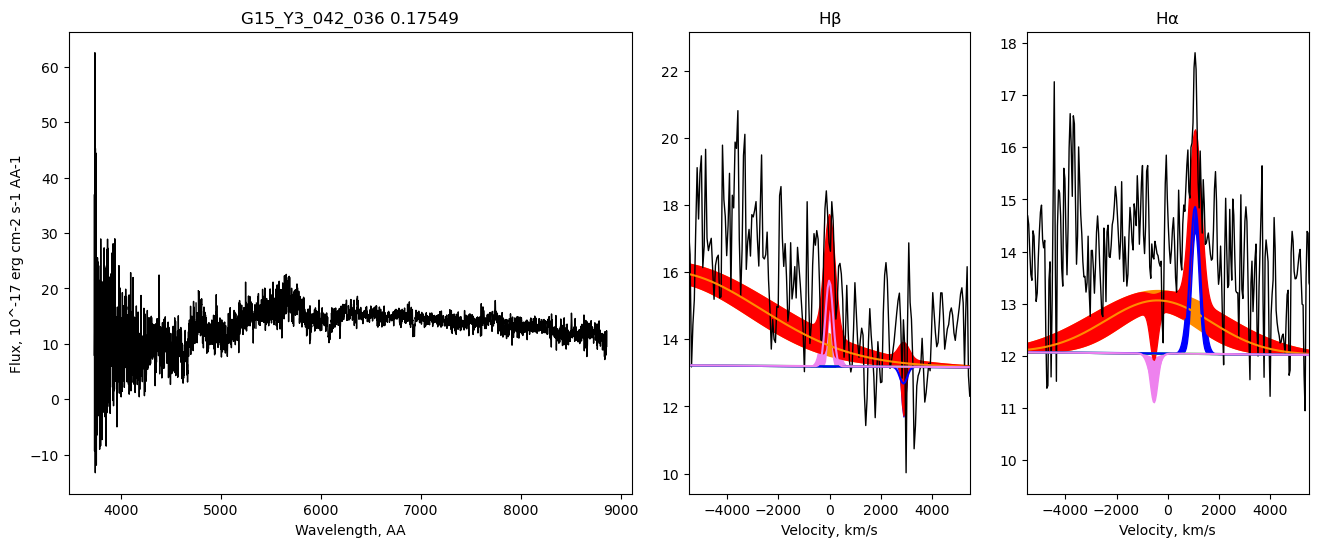

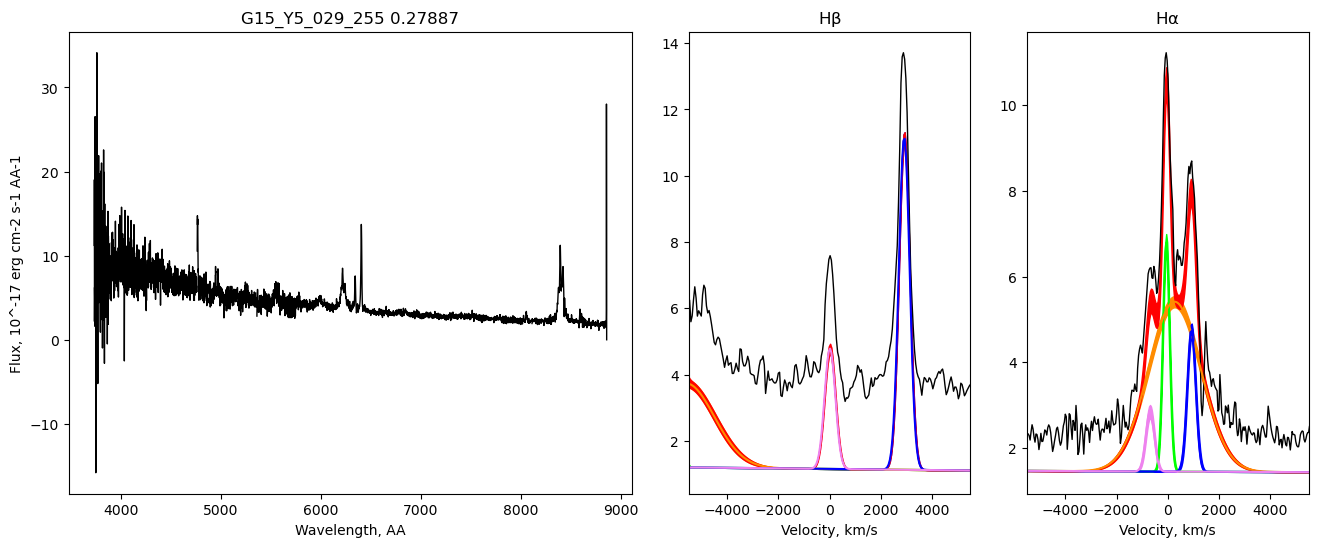

In [8]:
from __builder__ import *

path_to_images = r"E:/databases/GAUSS/SPECTRA_HA"

for i in range(len(HA_GAUSS['SPECID'])):
    path_to_save = path_to_images + '/' + HA_GAUSS['SPECID'][i] +'.png'
    data_row = HA_GAUSS[HA_GAUSS['SPECID'] == HA_GAUSS['SPECID'][i]]
    data_row.reset_index(inplace=True, drop=True)
    universal_plotter(HA_GAUSS['URL'][i], path_to_save, data_row)